<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DES VENTES EN LIGNE DE LA LIBRAIRIE LAPAGE (sans client BtoB)
</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd
pd.options.mode.copy_on_write = True

In [2]:
#Importation de la librairie plotly express (visualisation des données)
import plotly.express as px

In [3]:
#Importation de la librairie matplotlib (visualisation des données)
import matplotlib.pyplot as plt

In [4]:
#Importation de la librairie datetime (manipulation dates et heures)
from datetime import datetime

In [5]:
#Importation de la librairie numpy  (manipulation des tableaux et l'algèbre linéaire)
import numpy as np

In [6]:
#Importation de la librairie seaborn  (visualisation des données)
import seaborn as sns

In [7]:
#Importation de la librairie seaborn  (analyses statistiques)
import scipy.stats as stats

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [8]:
#Importation du fichier customers.csv
df_customer = pd.read_csv("customers_non_nettoyer.csv", sep=',')
#Importation du fichier products.csv
df_product = pd.read_csv("products_non_nettoyer.csv", sep=',')
#importation du fichier Transactions.csv
dtype_spec = {'id_prod': str, 'session_id': str, 'client_id': str}
df_transaction = pd.read_csv("Transactions.csv", sep=';', dtype=dtype_spec, parse_dates=['date'])

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier customers.csv</h3>
</div>

In [9]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_customer: {}".format(df_customer.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} clients".format(df_customer.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_customer.shape[1]))

Dimensions du dataset df_customer: (8623, 3)
Le tableau comporte 8623 clients
Le tableau comporte 3 colonnes


In [10]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_customer.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_customer.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_customer.nunique()))


La nature des données dans chacune des colonnes:
client_id    object
sex          object
birth         int64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
client_id    8623
sex          8623
birth        8623
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
client_id    8623
sex             2
birth          76
dtype: int64



In [11]:
#Affiche les 5 premières lignes de la table
df_customer.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [12]:
#Vérifie la cohérence des données de la colonne sex

# Vérifie les valeurs possibles prises par la colonne sex
print("Valeurs uniques de la colonne sex: {}".format(df_customer['sex'].unique()))


Valeurs uniques de la colonne sex: ['f' 'm']


In [13]:
#Vérifie la cohérence des données de la colonne birth

# Récupère l'année actuelle
current_year = datetime.now().year

# Filtre les lignes où l'année de naissance est < 1900 ou > année actuelle
df_customer_filtered = df_customer[(df_customer['birth'] >= 1900) & (df_customer['birth'] <= current_year)]

# Affiche le DataFrame filtré
print("Dataset df_customer:")
print(df_customer_filtered)



Dataset df_customer:
     client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]


In [14]:
#Vérifie la cohérence des données de la colonne client_id

# Filtre les lignes où 'client_id' correspond au format "c_" suivi d'un ou plusieurs chiffres
df_customer_filtered = df_customer_filtered[df_customer_filtered['client_id'].str.match(r'^c_\d+$')]

# Affiche le DataFrame filtré
print("Dataset df_customer:")
print(df_customer_filtered)

#Affiche les données erronées
print("\nDonnées erronées:")
print(df_customer[~df_customer['client_id'].str.match(r'^c_\d+$')])


Dataset df_customer:
     client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8621 rows x 3 columns]

Données erronées:
     client_id sex  birth
2735      ct_0   f   2001
8494      ct_1   m   2001


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier products.csv</h3>
</div>

In [15]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_product: {}".format(df_product.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} produits".format(df_product.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_product.shape[1]))

Dimensions du dataset df_product: (3287, 3)
Le tableau comporte 3287 produits
Le tableau comporte 3 colonnes


In [16]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_product.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_product.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_product.nunique()))

La nature des données dans chacune des colonnes:
id_prod     object
price      float64
categ        int64
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
id_prod    3287
price      3287
categ      3287
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
id_prod    3287
price      1455
categ         3
dtype: int64



In [17]:
#Affiche les 5 premières lignes de la table
df_product.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [18]:
#Vérifie la cohérence des données de la colonne id_prod

# Crée une expression régulière pour chaque ligne basée sur la colonne 'categ'
pattern = df_product['categ'].astype(str) + r"_\d+$"

# Filtre les lignes où 'id_prod' correspond à ce format
df_product_filtered = df_product[df_product.apply(lambda row: pd.Series(row['id_prod']).str.match(pattern[row.name]).any(), axis=1)]


# Affiche le DataFrame filtré
print("Dataset df_product:")
print(df_product_filtered)

#Affiche les données erronées
print("\nDonnées erronées:")
print(df_product[~df_product.apply(lambda row: pd.Series(row['id_prod']).str.match(pattern[row.name]).any(), axis=1)]
)

Dataset df_product:
     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3286 rows x 3 columns]

Données erronées:
    id_prod  price  categ
731     T_0   -1.0      0


In [19]:
# Filtre les lignes où 'price' est supérieur à 0
df_product_filtered = df_product_filtered[df_product_filtered['price'] > 0]

# Affiche le DataFrame filtré
print(df_product_filtered)

#Affiche les données erronées
print("\nDonnées erronées:")
print(df_product[df_product['price'] <= 0])

     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3286 rows x 3 columns]

Données erronées:
    id_prod  price  categ
731     T_0   -1.0      0


In [20]:
#Vérifie la cohérence des données de la colonne categ

# Vérifie les valeurs possibles prises par la colonne categ
print("Valeurs uniques de la colonne categ: {}".format(df_product['categ'].unique()))


Valeurs uniques de la colonne categ: [0 1 2]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier Transactions.csv</h3>
</div>

In [21]:
#Affiche les dimensions du dataset
print("Dimensions du dataset df_product: {}".format(df_transaction.shape))

#Consulte le nombre de lignes
print("Le tableau comporte {} transactions".format(df_transaction.shape[0]))

#Consulte le nombre de colonnes
print("Le tableau comporte {} colonnes".format(df_transaction.shape[1]))

Dimensions du dataset df_product: (1048575, 4)
Le tableau comporte 1048575 transactions
Le tableau comporte 4 colonnes


In [22]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
print("La nature des données dans chacune des colonnes:\n{}\n".format(df_transaction.dtypes))
print("Nombre de valeurs présentes dans chacune des colonnes:\n{}\n".format(df_transaction.count()))
print("Nombre de valeurs uniques présentes dans chacune des colonnes:\n{}\n".format(df_transaction.nunique()))

La nature des données dans chacune des colonnes:
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

Nombre de valeurs présentes dans chacune des colonnes:
id_prod       687534
date          687534
session_id    687534
client_id     687534
dtype: int64

Nombre de valeurs uniques présentes dans chacune des colonnes:
id_prod         3265
date          687415
session_id    345505
client_id       8600
dtype: int64



In [23]:
#Affiche les 5 premières lignes de la table
df_transaction.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [24]:
# Filtre les lignes où au moins une des colonnes spécifiées est vide
df_transaction_filtered = df_transaction[~
    df_transaction[['date', 'session_id', 'client_id', 'id_prod']].isna().any(axis=1) |
    (df_transaction[['date', 'session_id', 'client_id', 'id_prod']] == '').any(axis=1)
]

# Affiche le DataFrame filtré
print(df_transaction_filtered)

#Affiche les données erronées
print("\nDonnées erronées:")
print(df_transaction[
    df_transaction[['date', 'session_id', 'client_id', 'id_prod']].isna().any(axis=1) |
    (df_transaction[['date', 'session_id', 'client_id', 'id_prod']] == '').any(axis=1)
])

       id_prod                       date session_id client_id
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329
1       0_1390 2021-03-01 00:02:26.047414        s_2     c_664
2       0_1352 2021-03-01 00:02:38.311413        s_3     c_580
3       0_1458 2021-03-01 00:04:54.559692        s_4    c_7912
4       0_1358 2021-03-01 00:05:18.801198        s_5    c_2033
...        ...                        ...        ...       ...
687529   1_508 2023-02-28 23:49:03.148402   s_348444    c_3573
687530    2_37 2023-02-28 23:51:29.318531   s_348445      c_50
687531   1_695 2023-02-28 23:53:18.929676   s_348446     c_488
687532  0_1547 2023-02-28 23:58:00.107815   s_348447    c_4848
687533  0_1398 2023-02-28 23:58:30.792755   s_348435    c_3575

[687534 rows x 4 columns]

Données erronées:
        id_prod date session_id client_id
687534      NaN  NaT        NaN       NaN
687535      NaN  NaT        NaN       NaN
687536      NaN  NaT        NaN       NaN
687537      NaN  NaT        Na

In [25]:
#Vérifie la cohérence des données de la colonne session_id

# Filtre les lignes où 'session_id' correspond au format "s_" suivi d'un ou plusieurs chiffres
df_transaction_filtered = df_transaction_filtered[df_transaction_filtered['session_id'].str.match(r'^s_\d+$')]

# Affiche le DataFrame filtré
print("Dataset df_customer:")
print(df_transaction_filtered)

#Affiche les données erronées
print("\nDonnées erronées:")
print(df_transaction_filtered[~df_transaction_filtered['session_id'].str.match(r'^s_\d+$')])

Dataset df_customer:
       id_prod                       date session_id client_id
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329
1       0_1390 2021-03-01 00:02:26.047414        s_2     c_664
2       0_1352 2021-03-01 00:02:38.311413        s_3     c_580
3       0_1458 2021-03-01 00:04:54.559692        s_4    c_7912
4       0_1358 2021-03-01 00:05:18.801198        s_5    c_2033
...        ...                        ...        ...       ...
687529   1_508 2023-02-28 23:49:03.148402   s_348444    c_3573
687530    2_37 2023-02-28 23:51:29.318531   s_348445      c_50
687531   1_695 2023-02-28 23:53:18.929676   s_348446     c_488
687532  0_1547 2023-02-28 23:58:00.107815   s_348447    c_4848
687533  0_1398 2023-02-28 23:58:30.792755   s_348435    c_3575

[687534 rows x 4 columns]

Données erronées:
Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_transaction et df_customer</h3>
</div>

In [26]:
#Fusion des fichiers df_transaction et df_customer
df_merge = pd.merge(df_transaction, df_customer, on='client_id', how='inner')


In [27]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
print(df_merge.shape)
#nombre_valeurs_nulles = df_merge[''].isnull().sum()
#print(nombre_valeurs_nulles)
print("Toute les lignes matche on retrouve bien 687534 lignes avec une jointure interne")

(687534, 6)
Toute les lignes matche on retrouve bien 687534 lignes avec une jointure interne


In [28]:
#récapitualitf des données
print(df_merge.head())
print(df_merge.shape)
print(df_merge.dtypes)

  id_prod                       date session_id client_id sex  birth
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f   1967
1   1_498 2021-03-11 00:57:22.865244     s_4624     c_329   f   1967
2  0_1140 2021-03-16 10:01:30.705174     s_7071     c_329   f   1967
3   1_451 2021-03-18 17:26:18.887580     s_8134     c_329   f   1967
4   1_381 2021-04-25 13:26:06.218857    s_25561     c_329   f   1967
(687534, 6)
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                  int64
dtype: object


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_product</h3>
</div>

In [29]:
#Fusion des fichiers df_merge et df_product
df_merge = pd.merge(df_merge, df_product, on='id_prod', how='inner')


In [30]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
print(df_merge.shape)
#nombre_valeurs_nulles = df_merge[''].isnull().sum()
#print(nombre_valeurs_nulles)
print("Toute les lignes matche on retrouve bien 687534 lignes avec une jointure interne")

(687534, 8)
Toute les lignes matche on retrouve bien 687534 lignes avec une jointure interne


In [31]:
#Récapitulatif des données
print(df_merge.head())
print(df_merge.shape)
print(df_merge.dtypes)

  id_prod                       date session_id client_id sex  birth  price  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f   1967  11.99   
1  0_1259 2022-10-01 00:01:07.843138   s_275943     c_329   f   1967  11.99   
2  0_1259 2022-12-01 00:01:07.843138   s_305291     c_329   f   1967  11.99   
3  0_1259 2023-01-01 00:01:07.843138   s_320153     c_329   f   1967  11.99   
4  0_1259 2021-03-04 07:26:01.343183     s_1519    c_1609   m   1980  11.99   

   categ  
0      0  
1      0  
2      0  
3      0  
4      0  
(687534, 8)
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                  int64
price                float64
categ                  int64
dtype: object


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Elaboration du dataset df_merge</h3>
</div>

In [32]:
#Exemple pour mettre une colonne en index

# Mettre la colonne 'date' en tant qu'index
#df_merge = df_merge.set_index('date')

In [33]:
df_merge.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0
1,0_1259,2022-10-01 00:01:07.843138,s_275943,c_329,f,1967,11.99,0
2,0_1259,2022-12-01 00:01:07.843138,s_305291,c_329,f,1967,11.99,0
3,0_1259,2023-01-01 00:01:07.843138,s_320153,c_329,f,1967,11.99,0
4,0_1259,2021-03-04 07:26:01.343183,s_1519,c_1609,m,1980,11.99,0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.4 - Suppression des clients atypiques (BtoB)</h3>
</div>

In [34]:
# Calcul du chiffre d'affaires par client
revenue_by_client = df_merge.groupby('client_id')['price'].sum()

revenue_by_client.describe()

count      8600.000000
mean       1398.565477
std        5202.771679
min           6.310000
25%         562.730000
50%        1045.695000
75%        1797.720000
max      326039.890000
Name: price, dtype: float64

In [35]:
# Sélection des 10 meilleurs clients
top_10_clients = revenue_by_client.nlargest(10)

top_10_clients.head(10)

client_id
c_1609    326039.89
c_4958    290227.03
c_6714    153918.60
c_3454    114110.57
c_1570      5285.82
c_3263      5276.87
c_2140      5260.18
c_2899      5214.05
c_7319      5155.77
c_7959      5135.75
Name: price, dtype: float64

In [36]:
# Liste des client_id à supprimer
clients_a_supprimer = ['c_1609', 'c_4958', 'c_6714', 'c_3454']

# Filtre le dataset pour garder uniquement les clients qui ne sont pas dans cette liste
df_merge = df_merge[~df_merge['client_id'].isin(clients_a_supprimer)]

In [37]:
print(df_merge['client_id'].nunique())

8596


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse du chiffre d'affaires </h2>
</div>

In [38]:
# Création colonne age

# Obtenir l'année actuelle
current_year = datetime.now().year - 1

# Calcule l'âge à partir de l'année de naissance
df_merge['age'] = current_year - df_merge['birth']

In [39]:
#Calcule le CA total (sans BtoB)
ca_total = df_merge['price'].sum()

#Affiche le CA total
print(f"Le chiffre d'affaires total est : {round(ca_total,2)}€")

Le chiffre d'affaires total est : 11143367.01€


C:\Users\kevin\AppData\Local\Temp\ipykernel_3148\996078180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df_merge.resample('D', on='date').sum()


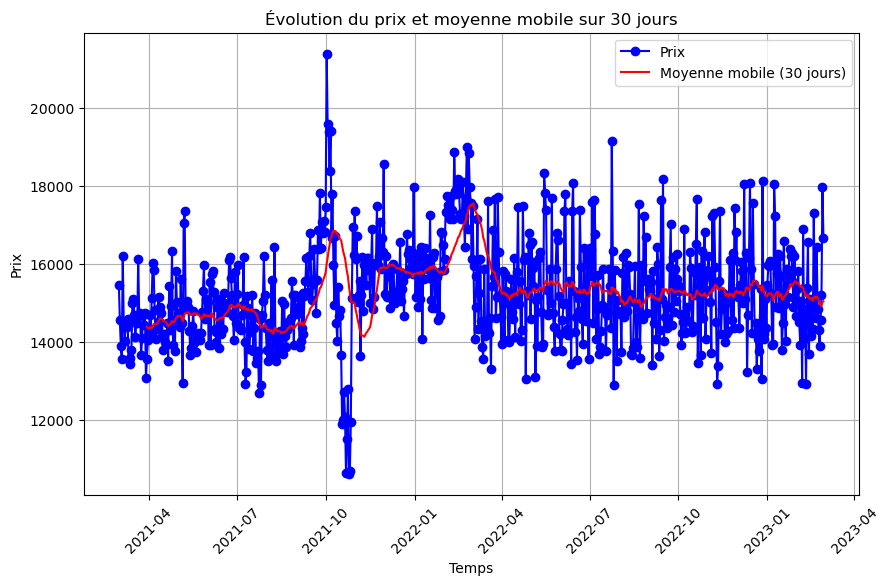

In [40]:
# Trie les données par date
df_merge = df_merge.sort_values('date')

# Resample les données par jour, en prenant la somme des prix pour chaque jour
df_resampled = df_merge.resample('D', on='date').sum()

# Calcule la moyenne mobile sur 7 jours
df_resampled['rolling_mean'] = df_resampled['price'].rolling(window=30).mean()

# Crée la figure et les axes
plt.figure(figsize=(10, 6))

# Trace les données originales (resamplées)
plt.plot(df_resampled.index, df_resampled["price"], marker='o', linestyle='-', color='b', label='Prix')

# Trace la moyenne mobile
plt.plot(df_resampled.index, df_resampled["rolling_mean"], linestyle='-', color='r', label='Moyenne mobile (30 jours)')

# Ajoute un titre et des labels aux axes
plt.title('Évolution du prix et moyenne mobile sur 30 jours')
plt.xlabel('Temps')
plt.ylabel('Prix')

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajoute une légende
plt.legend()

# Affiche la grille
plt.grid(True)

# Affiche le graphique
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_3148\2860436922.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df_merge.resample('D', on='date').sum()


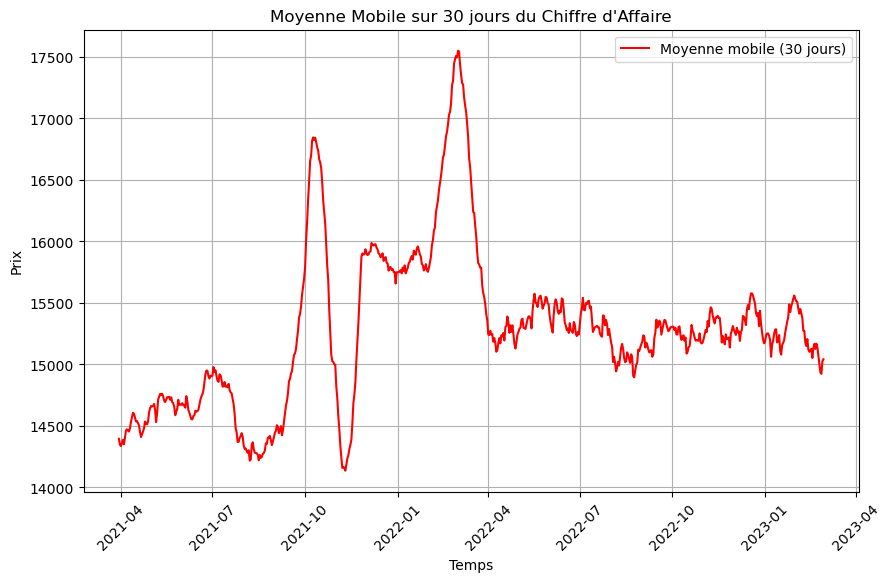

In [41]:
# Trie les données par date
df_merge = df_merge.sort_values('date')

# Resample les données par jour, en prenant la somme des prix pour chaque jour
df_resampled = df_merge.resample('D', on='date').sum()

# Calcule la moyenne mobile sur 7 jours
df_resampled['rolling_mean'] = df_resampled['price'].rolling(window=30).mean()

# Crée la figure et les axes
plt.figure(figsize=(10, 6))

# Trace les données originales (resamplées)
#plt.plot(df_resampled.index, df_resampled["price"], marker='o', linestyle='-', color='b', label='Prix')

# Trace la moyenne mobile
plt.plot(df_resampled.index, df_resampled["rolling_mean"], linestyle='-', color='r', label='Moyenne mobile (30 jours)')

# Ajoute un titre et des labels aux axes
plt.title('Moyenne Mobile sur 30 jours du Chiffre d\'Affaire')
plt.xlabel('Temps')
plt.ylabel('Prix')

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajoute une légende
plt.legend()

# Affiche la grille
plt.grid(True)

# Affiche le graphique
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_3148\1243424473.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df_merge.resample('D', on='date').sum()


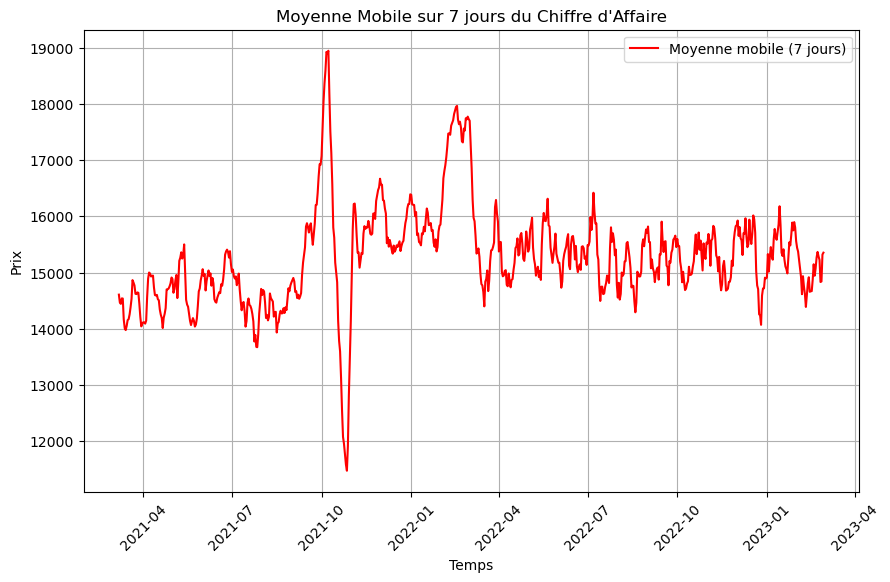

In [42]:
# Trie les données par date
df_merge = df_merge.sort_values('date')

# Resample les données par jour, en prenant la somme des prix pour chaque jour
df_resampled = df_merge.resample('D', on='date').sum()

# Calcule la moyenne mobile sur 7 jours
df_resampled['rolling_mean'] = df_resampled['price'].rolling(window=7).mean()

# Crée la figure et les axes
plt.figure(figsize=(10, 6))

# Trace les données originales (resamplées)
#plt.plot(df_resampled.index, df_resampled["price"], marker='o', linestyle='-', color='b', label='Prix')

# Trace la moyenne mobile
plt.plot(df_resampled.index, df_resampled["rolling_mean"], linestyle='-', color='r', label='Moyenne mobile (7 jours)')

# Ajoute un titre et des labels aux axes
plt.title('Moyenne Mobile sur 7 jours du Chiffre d\'Affaire')
plt.xlabel('Temps')
plt.ylabel('Prix')

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajoute une légende
plt.legend()

# Affiche la grille
plt.grid(True)

# Affiche le graphique
plt.show()


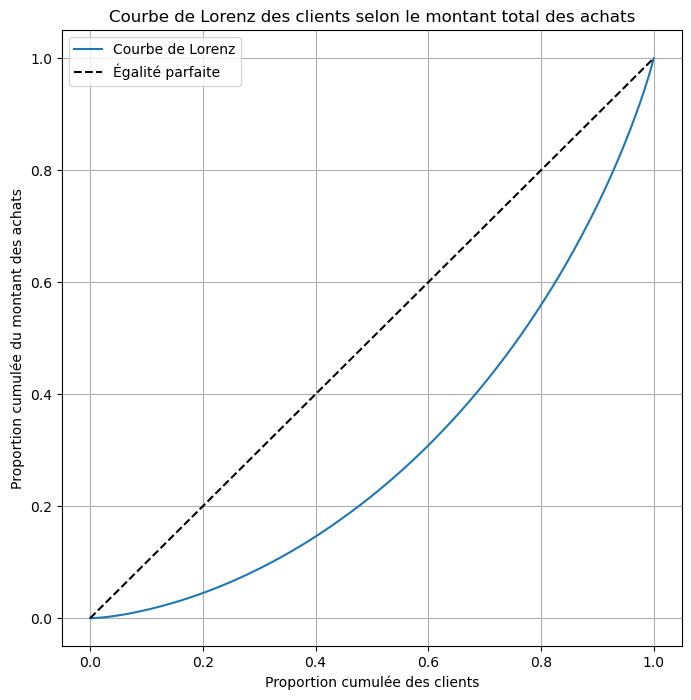

In [43]:
#Regroupe par client et calculer la somme des achats
df_client_total = df_merge.groupby('client_id')['price'].sum().reset_index()

#Trie les clients par somme des achats croissante
df_client_total_sorted = df_client_total.sort_values(by='price')

#Calcule la proportion cumulée des clients et des montants
df_client_total_sorted['cum_client_pct'] = np.linspace(0, 1, len(df_client_total_sorted))
df_client_total_sorted['cum_price_pct'] = df_client_total_sorted['price'].cumsum() / df_client_total_sorted['price'].sum()

#Trace la courbe de Lorenz
plt.figure(figsize=(8, 8))
plt.plot(df_client_total_sorted['cum_client_pct'], df_client_total_sorted['cum_price_pct'], label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Égalité parfaite')
plt.xlabel('Proportion cumulée des clients')
plt.ylabel('Proportion cumulée du montant des achats')
plt.title('Courbe de Lorenz des clients selon le montant total des achats')
plt.legend()
plt.grid(True)
plt.show()


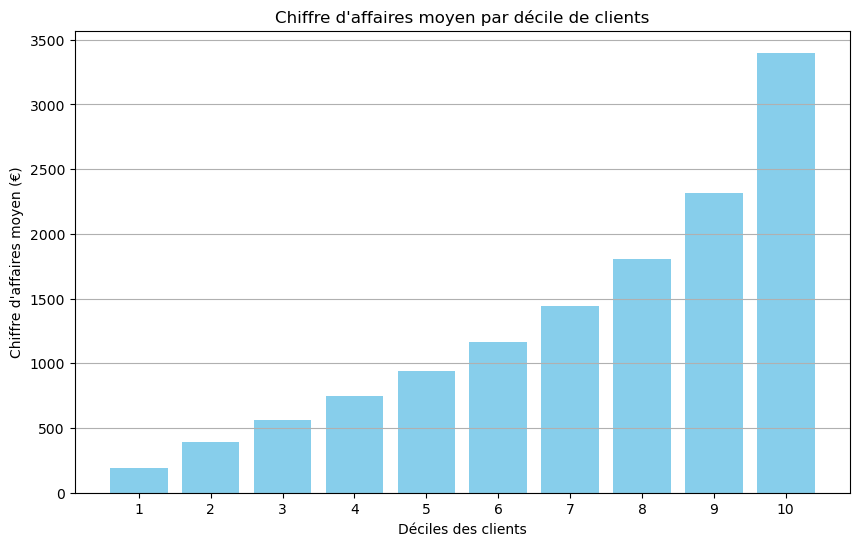

In [44]:
#Calcule le chiffre d'affaires total par client
df_client_total = df_merge.groupby('client_id')['price'].sum().reset_index()

#Classe les clients en déciles
df_client_total['decile'] = pd.qcut(df_client_total['price'], 10, labels=False) + 1

#Calcule le chiffre d'affaires moyen par décile
df_deciles = df_client_total.groupby('decile')['price'].mean().reset_index()

#Trace le graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(df_deciles['decile'], df_deciles['price'], color='skyblue')
plt.xlabel('Déciles des clients')
plt.ylabel('Chiffre d\'affaires moyen (€)')
plt.title('Chiffre d\'affaires moyen par décile de clients')
plt.xticks(df_deciles['decile'])
plt.grid(axis='y')
plt.show()


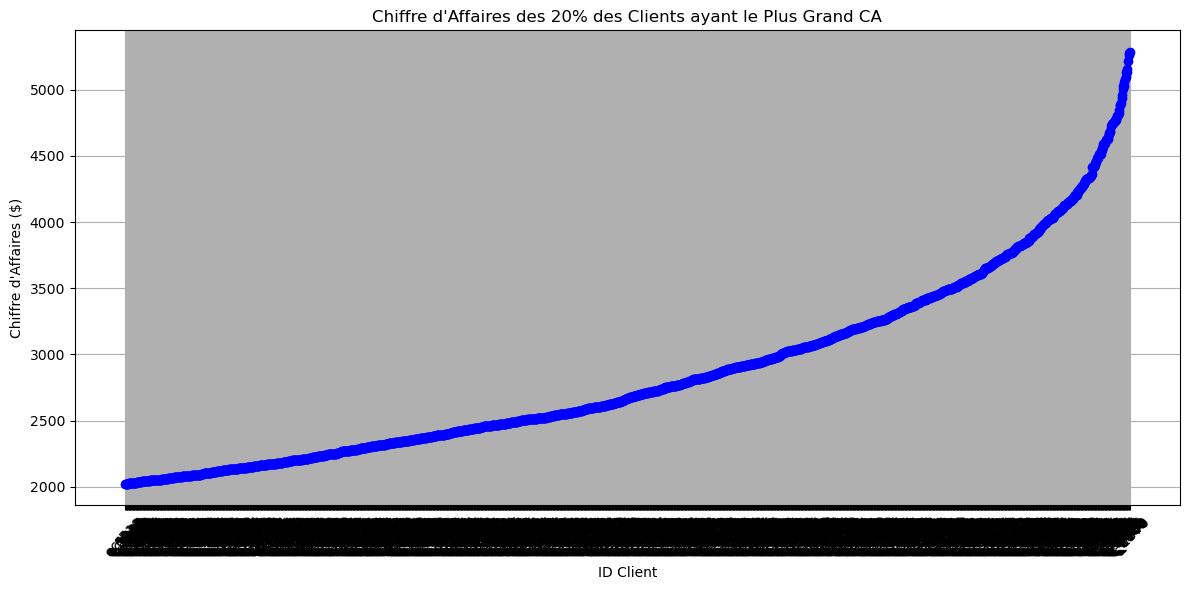

In [45]:
# Calcul du chiffre d'affaires par client
revenue_by_client = df_merge.groupby('client_id')['price'].sum()

# Trie les clients par chiffre d'affaires croissant
revenue_by_client_sorted = revenue_by_client.sort_values()

# Filtre les 20 % des clients avec le plus grand chiffre d'affaires
top_20_percent_clients = revenue_by_client_sorted.tail(int(len(revenue_by_client_sorted) * 0.2))

# Création du graphique en courbe pour les 20 % des clients avec le plus grand CA
plt.figure(figsize=(12, 6))
plt.plot(top_20_percent_clients.index, top_20_percent_clients.values, marker='o', color='blue')
plt.title('Chiffre d\'Affaires des 20% des Clients ayant le Plus Grand CA')
plt.xlabel('ID Client')
plt.ylabel('Chiffre d\'Affaires ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


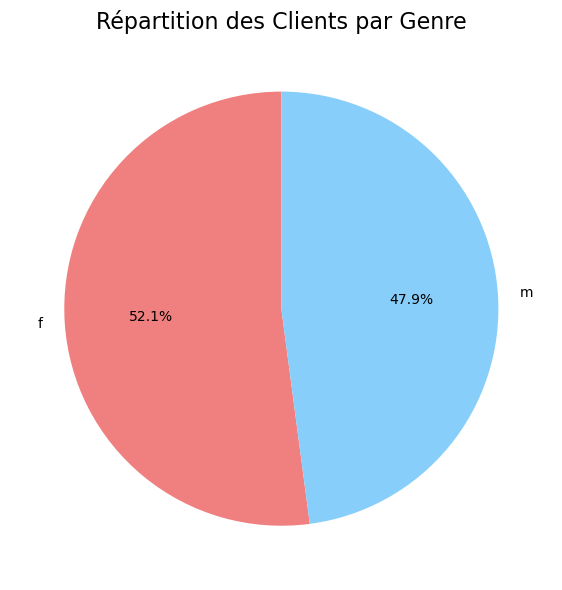

In [46]:
#Répartition des achats par genre
transactions_par_sexe = df_merge.groupby('sex')['client_id'].nunique()

#Pie chart pour visualiser la répartition par sexe
plt.figure(figsize=(6,6))
transactions_par_sexe.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Répartition des Clients par Genre', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

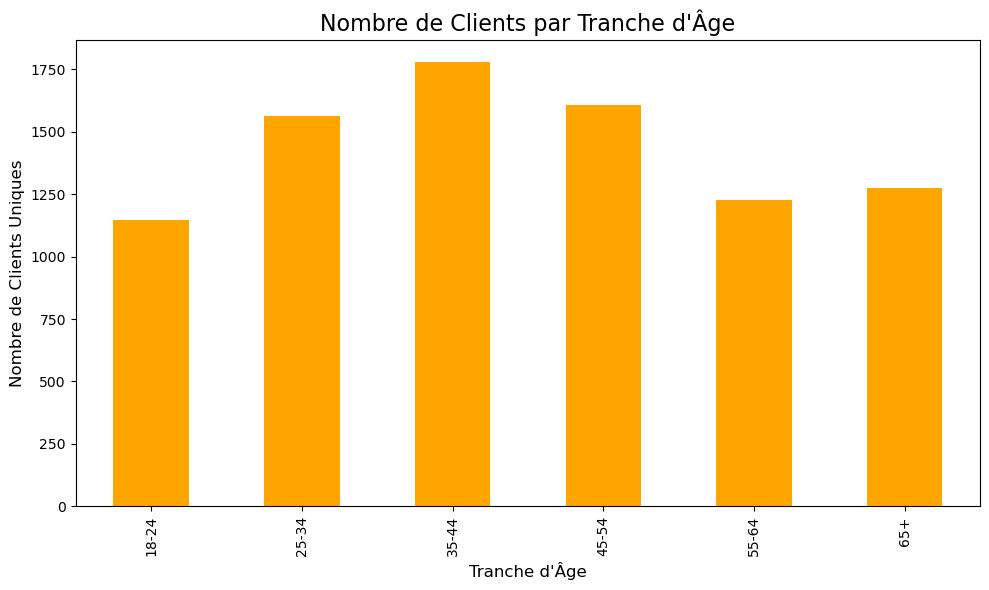

In [47]:
# Défini des tranches d'âge
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_merge['age_group'] = pd.cut(df_merge['age'], bins=bins, labels=labels, right=False)

# Nombre de clients uniques par tranche d'âge
clients_par_age_group = df_merge.groupby('age_group')['client_id'].nunique()

# Bar plot pour visualiser les clients par tranche d'âge
plt.figure(figsize=(10,6))
clients_par_age_group.plot(kind='bar', color='orange')
plt.title('Nombre de Clients par Tranche d\'Âge', fontsize=16)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Nombre de Clients Uniques', fontsize=12)
plt.tight_layout()
plt.show()

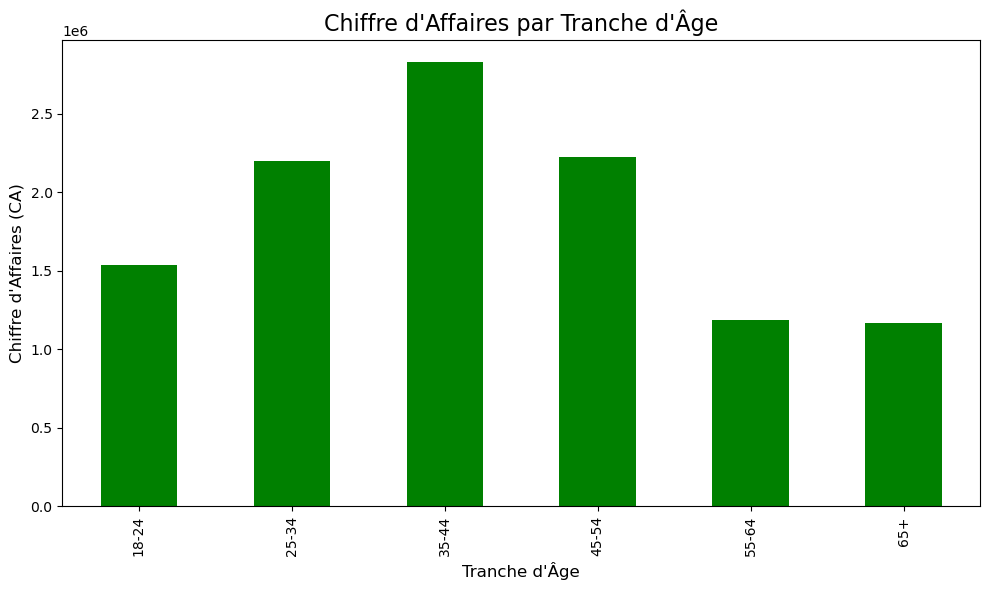

In [48]:
# Défini les tranches d'âge
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_merge['age_group'] = pd.cut(df_merge['age'], bins=bins, labels=labels, right=False)

# Calcule le CA total par tranche d'âge
ca_par_age_group = df_merge.groupby('age_group')['price'].sum()

# Crée le bar plot pour visualiser le CA par tranche d'âge
plt.figure(figsize=(10, 6))
ca_par_age_group.plot(kind='bar', color='green')
plt.title('Chiffre d\'Affaires par Tranche d\'Âge', fontsize=16)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Chiffre d\'Affaires (CA)', fontsize=12)
plt.tight_layout()
plt.show()

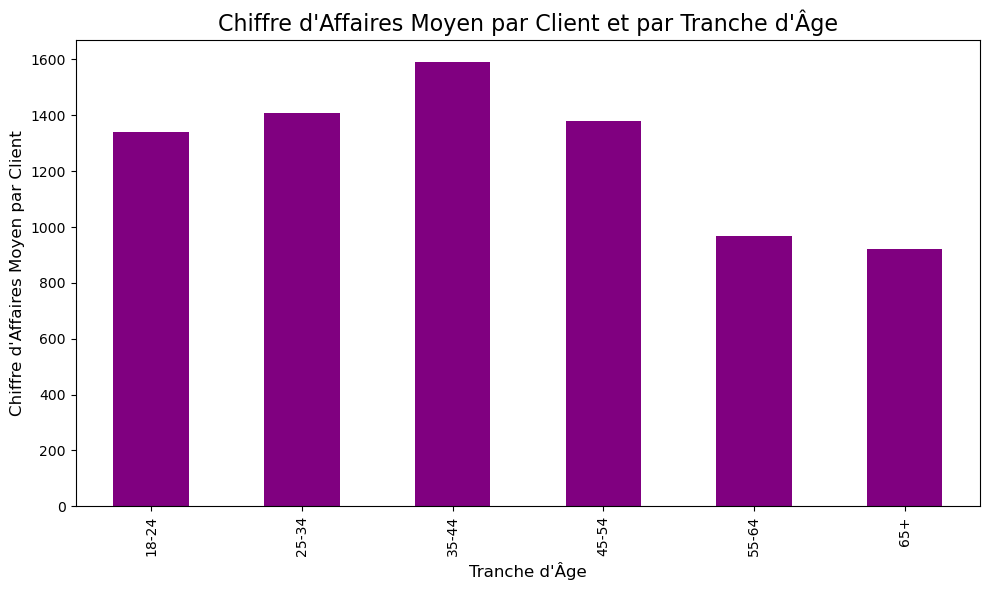

In [49]:
# Défini les tranches d'âge
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_merge['age_group'] = pd.cut(df_merge['age'], bins=bins, labels=labels, right=False)

# Calcule le CA total par tranche d'âge
ca_total_par_age_group = df_merge.groupby('age_group')['price'].sum()

# Calcule le nombre de clients uniques par tranche d'âge
clients_uniques_par_age_group = df_merge.groupby('age_group')['client_id'].nunique()

# Calcule le CA moyen par client (CA total / nombre de clients uniques)
ca_moyen_par_client = ca_total_par_age_group / clients_uniques_par_age_group

# Crée le bar plot pour visualiser le CA moyen par client et par tranche d'âge
plt.figure(figsize=(10, 6))
ca_moyen_par_client.plot(kind='bar', color='purple')
plt.title('Chiffre d\'Affaires Moyen par Client et par Tranche d\'Âge', fontsize=16)
plt.xlabel('Tranche d\'Âge', fontsize=12)
plt.ylabel('Chiffre d\'Affaires Moyen par Client', fontsize=12)
plt.tight_layout()
plt.show()

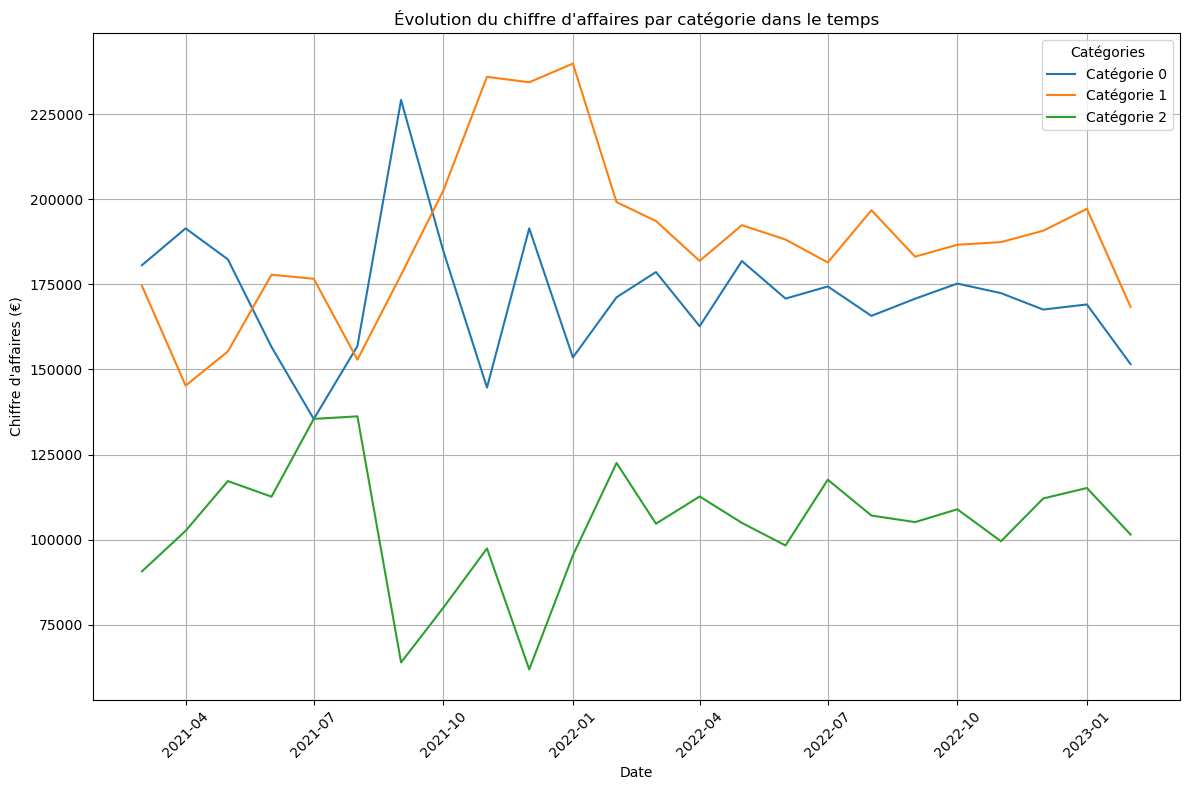

In [50]:
#Calcule le chiffre d'affaires mensuel par catégorie
df_monthly_sales = df_merge.groupby([df_merge['date'].dt.to_period('M'), 'categ'])['price'].sum().reset_index()
df_monthly_sales['date'] = df_monthly_sales['date'].dt.to_timestamp()

#Trace l'évolution du chiffre d'affaires par catégorie
plt.figure(figsize=(12, 8))

#Trace une courbe pour chaque catégorie
for categ in df_monthly_sales['categ'].unique():
    categ_data = df_monthly_sales[df_monthly_sales['categ'] == categ]
    plt.plot(categ_data['date'], categ_data['price'], label=f'Catégorie {categ}')

plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires (€)')
plt.title('Évolution du chiffre d\'affaires par catégorie dans le temps')
plt.legend(title='Catégories')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [51]:
#Calcule le nombre de clients uniques
nb_clients_uniques = df_merge['client_id'].nunique()

#Affiche le nombre de clients uniques
print(f"Le nombre de clients uniques est : {nb_clients_uniques}")

Le nombre de clients uniques est : 8596


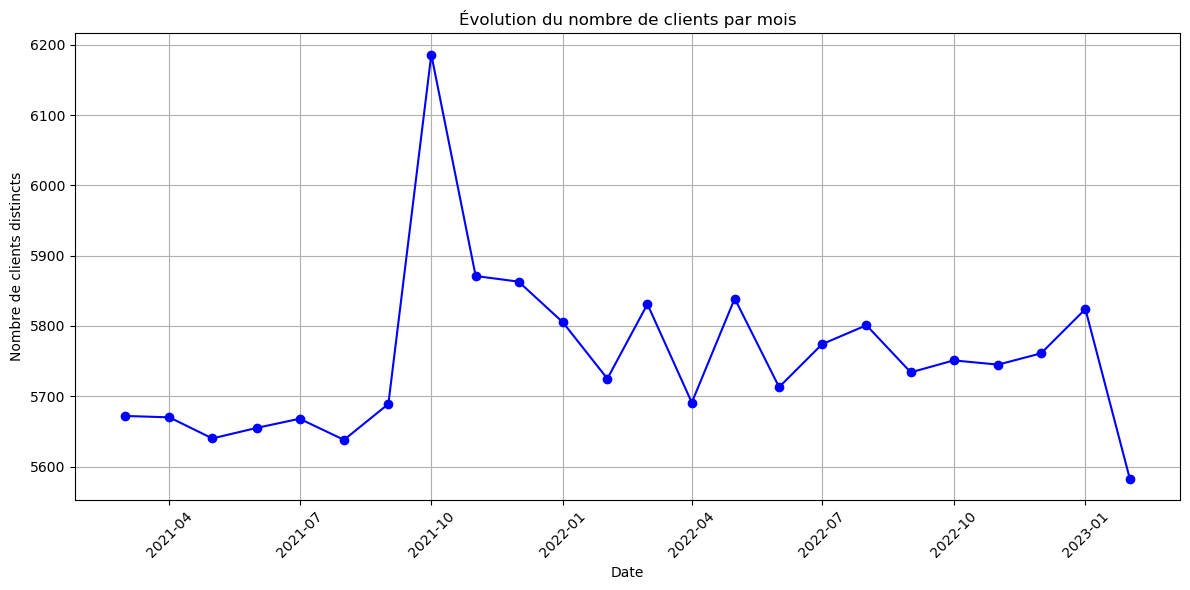

In [52]:
#Calcule le nombre de clients distincts par mois
df_monthly_clients = df_merge.groupby(df_merge['date'].dt.to_period('M'))['client_id'].nunique().reset_index()
df_monthly_clients['date'] = df_monthly_clients['date'].dt.to_timestamp()

#Trace l'évolution du nombre de clients par mois
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_clients['date'], df_monthly_clients['client_id'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Nombre de clients distincts')
plt.title('Évolution du nombre de clients par mois')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
#Calcule le nombre de transactions uniques
nb_transactions = df_merge['session_id'].nunique()

#Affiche le nombre de transactions uniques
print(f"Nombre total de transactions : {nb_transactions}")

Nombre total de transactions : 322466


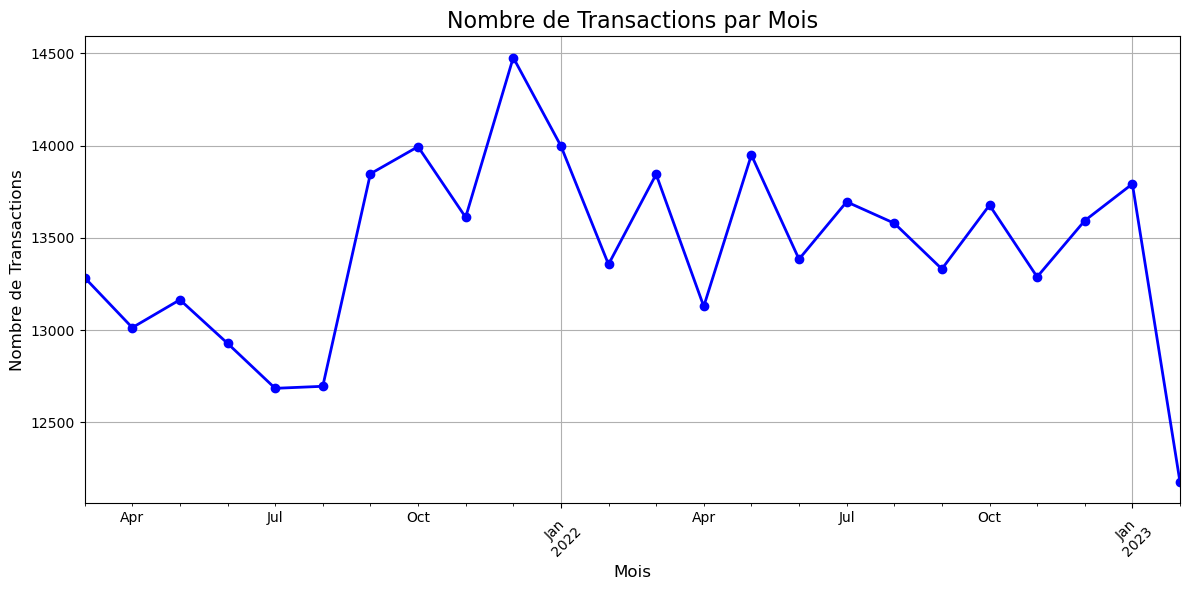

In [54]:
# Extrair l'année et le mois de chaque transaction
df_merge['year_month'] = df_merge['date'].dt.to_period('M')

# Compte les transactions uniques (session_id unique) par mois
df_monthly_transactions = df_merge.groupby('year_month')['session_id'].nunique()

# Crée la courbe
plt.figure(figsize=(12,6))
df_monthly_transactions.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2)

# Ajoute des titres et labels
plt.title('Nombre de Transactions par Mois', fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de Transactions', fontsize=12)
plt.grid(True)
# Rotation des labels sur l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Affiche la courbe
plt.tight_layout()
plt.show()


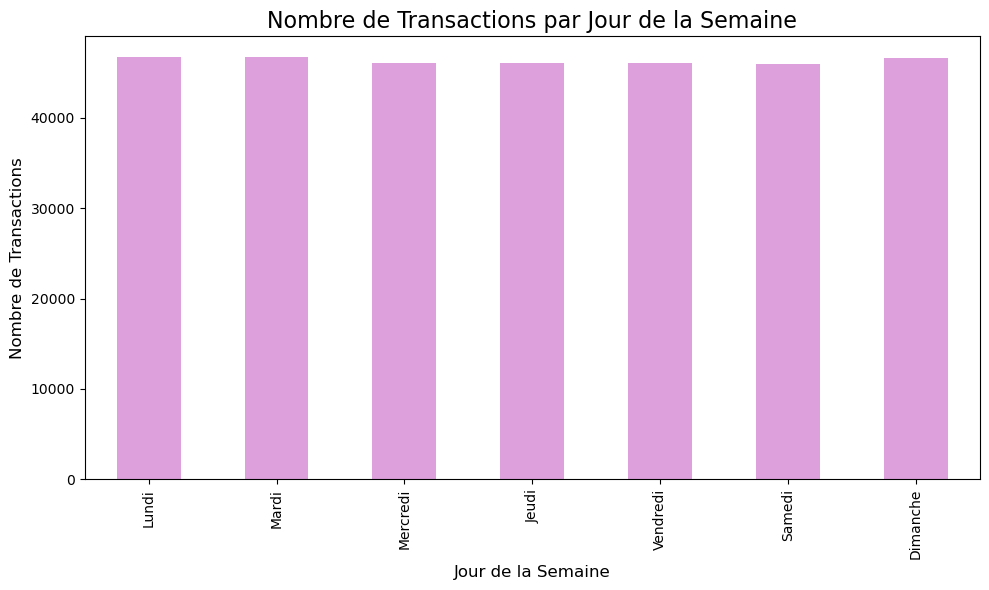

In [55]:
# Extraire le jour de la semaine
df_merge['day_of_week'] = df_merge['date'].dt.day_name()

# Traduis les jours en français
jours_francais = {
    'Monday': 'Lundi', 
    'Tuesday': 'Mardi', 
    'Wednesday': 'Mercredi', 
    'Thursday': 'Jeudi', 
    'Friday': 'Vendredi', 
    'Saturday': 'Samedi', 
    'Sunday': 'Dimanche'
}

# Applique la traduction des jours dans le DataFrame
df_merge['day_of_week_fr'] = df_merge['day_of_week'].map(jours_francais)

# Nombre de transactions par jour de la semaine
transactions_par_jour = df_merge.groupby('day_of_week_fr')['session_id'].nunique()

# Bar plot pour visualiser le nombre de transactions par jour de la semaine
plt.figure(figsize=(10,6))
transactions_par_jour.reindex(['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']).plot(kind='bar', color='plum')
plt.title('Nombre de Transactions par Jour de la Semaine', fontsize=16)
plt.xlabel('Jour de la Semaine', fontsize=12)
plt.ylabel('Nombre de Transactions', fontsize=12)
plt.tight_layout()
plt.show()


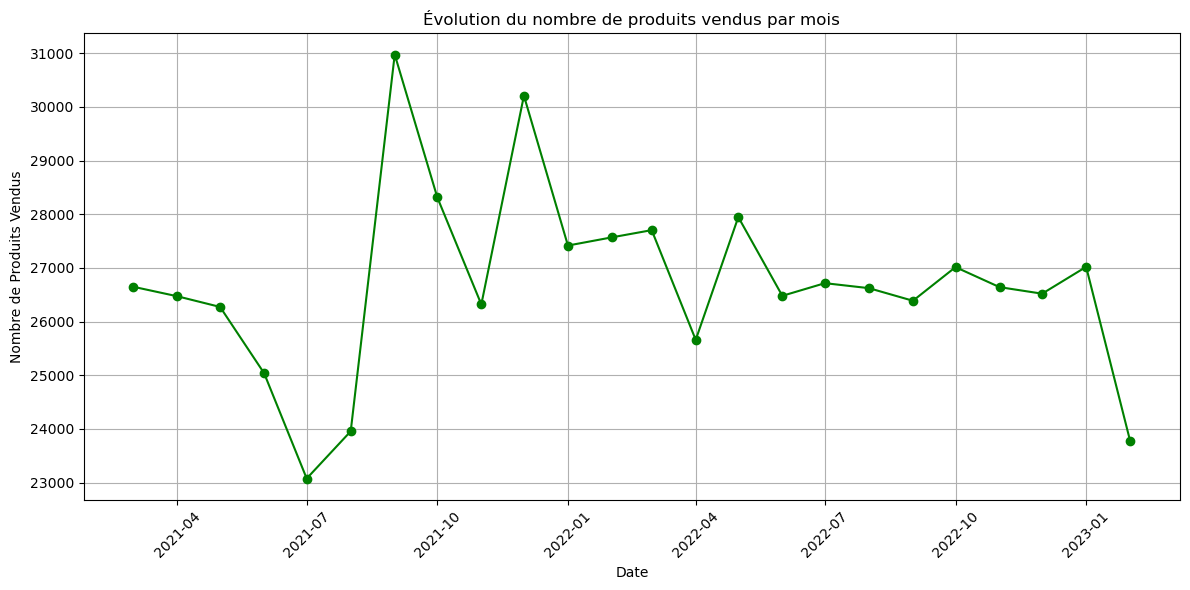

In [56]:
#Calcule le nombre de produits vendus par mois
df_monthly_sale = df_merge.groupby(df_merge['date'].dt.to_period('M')).size().reset_index(name='sale_count')
df_monthly_sale['date'] = df_monthly_sale['date'].dt.to_timestamp()

#Trace l'évolution du nombre de transactions par mois
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_sale['date'], df_monthly_sale['sale_count'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Nombre de Produits Vendus')
plt.title('Évolution du nombre de produits vendus par mois')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


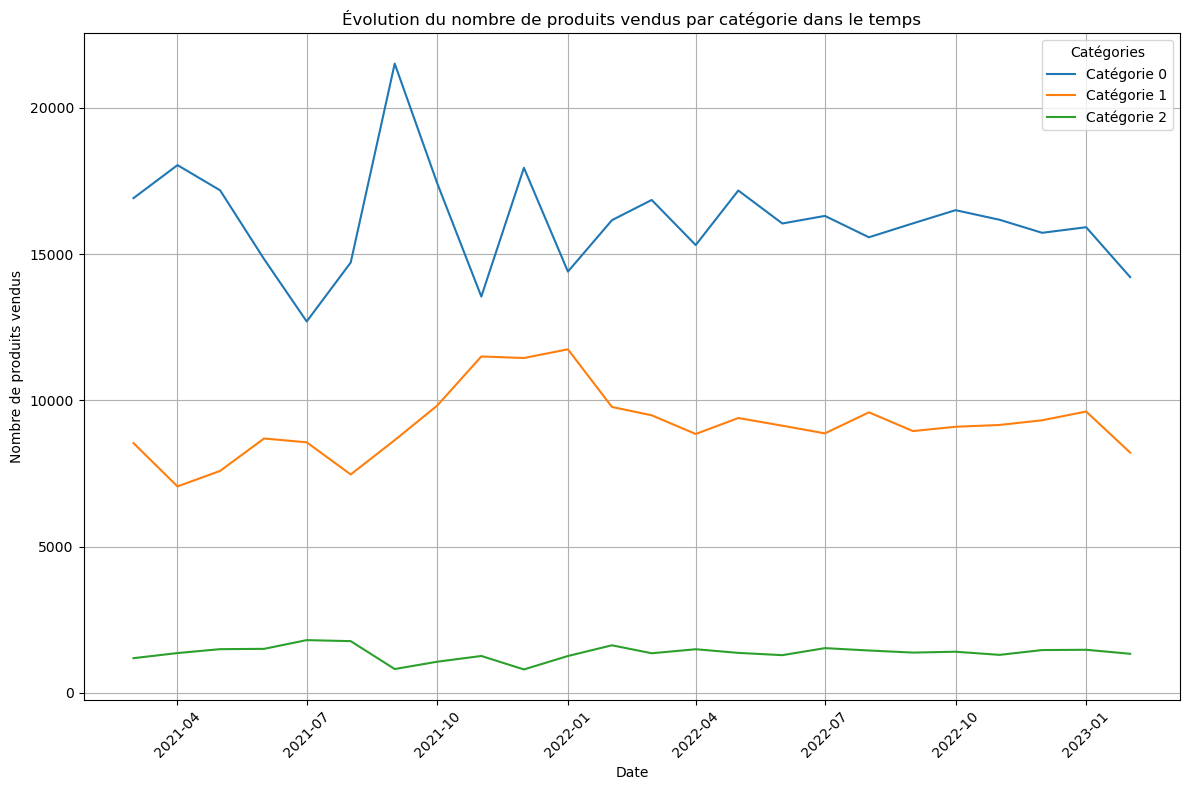

In [57]:
#Calcule le nombre de transactions par mois
df_monthly_countsales = df_merge.groupby([df_merge['date'].dt.to_period('M'), 'categ']).size().reset_index(name='sales_count')
df_monthly_countsales['date'] = df_monthly_countsales['date'].dt.to_timestamp()


#Trace l'évolution du chiffre d'affaires par catégorie
plt.figure(figsize=(12, 8))

#Trace une courbe pour chaque catégorie
for categ in df_monthly_countsales['categ'].unique():
    categ_data = df_monthly_countsales[df_monthly_countsales['categ'] == categ]
    plt.plot(categ_data['date'], categ_data['sales_count'], label=f'Catégorie {categ}')

plt.xlabel('Date')
plt.ylabel('Nombre de produits vendus')
plt.title('Évolution du nombre de produits vendus par catégorie dans le temps')
plt.legend(title='Catégories')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


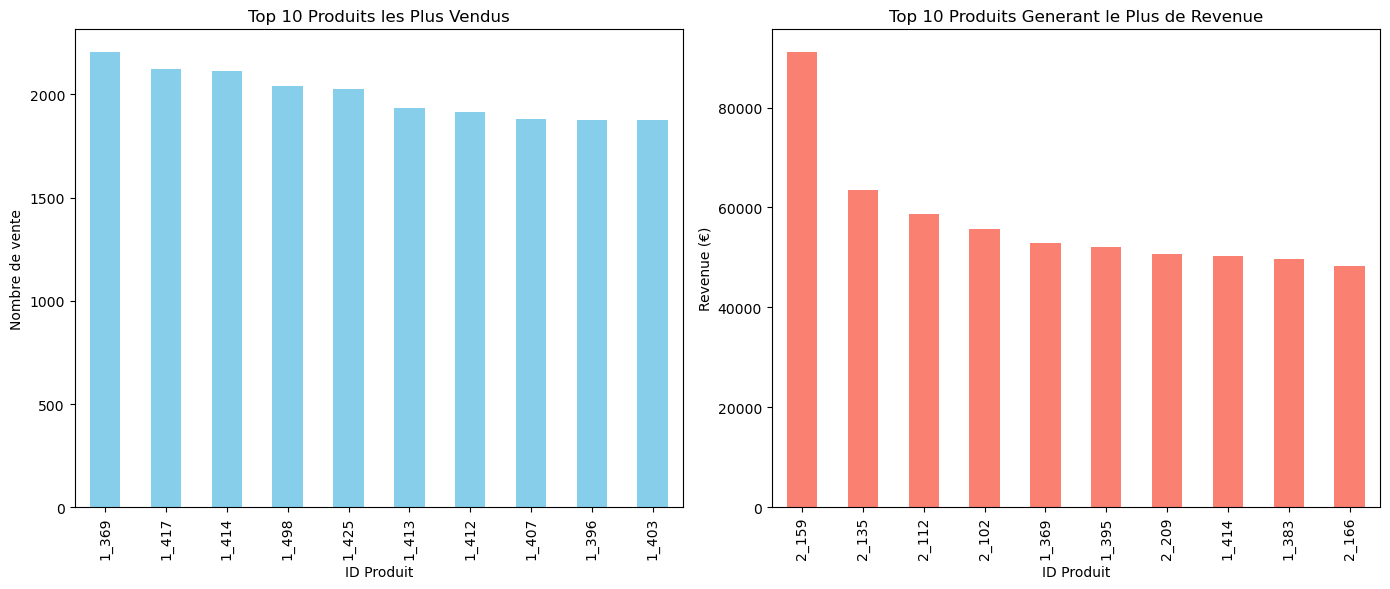

In [58]:
#Récupère le Top 10 Produits les Plus Vendus
top_sold_products = df_merge['id_prod'].value_counts().nlargest(10)

#Récupère le Top 10 Produits Generant le Plus de Revenue
df_merge['revenue'] = df_merge['price']
top_revenue_products = df_merge.groupby('id_prod')['revenue'].sum().nlargest(10)

#Trace les graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Trace le graphique en barres: Top 10 Produits les Plus Vendus
top_sold_products.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Top 10 Produits les Plus Vendus')
ax1.set_xlabel('ID Produit')
ax1.set_ylabel('Nombre de vente')

#Trace le graphique en barres: Top 10 Produits Generant le Plus de Revenue
top_revenue_products.plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Top 10 Produits Generant le Plus de Revenue')
ax2.set_xlabel('ID Produit')
ax2.set_ylabel('Revenue (€)')

plt.tight_layout()
plt.show()

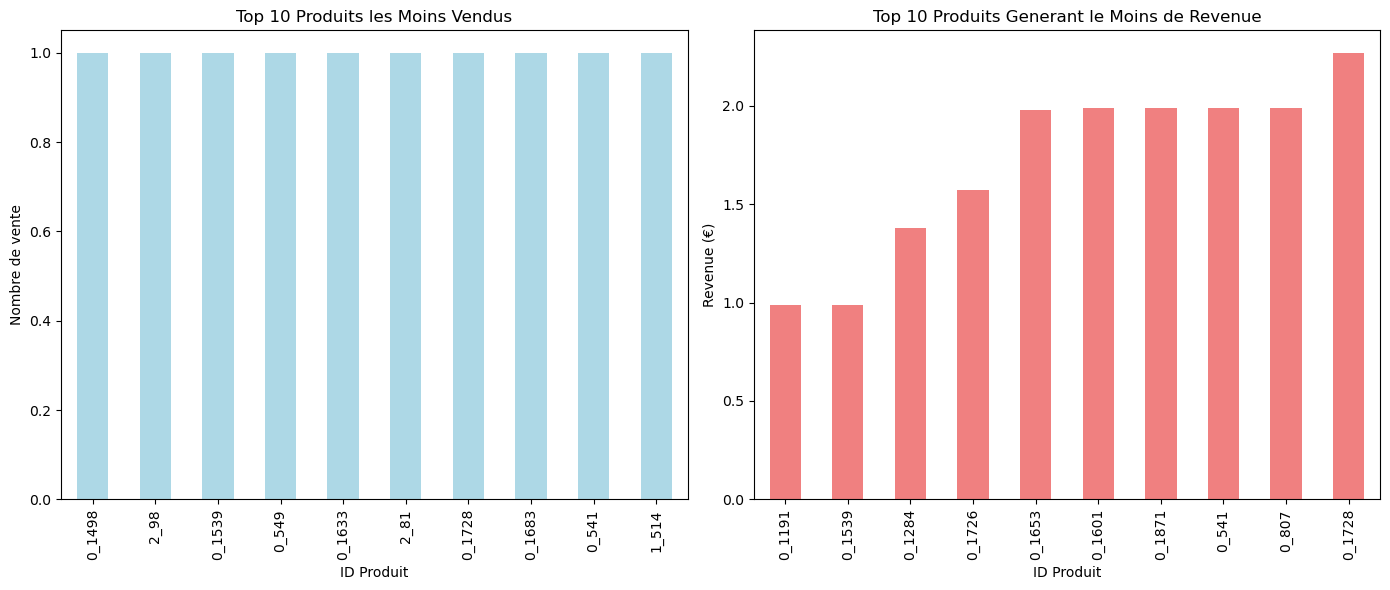

In [59]:
#Récupère le Top 10 Produits les Moins Vendus
least_sold_products = df_merge['id_prod'].value_counts().nsmallest(10)

#Récupère le Top 10 Produits Generant le Plus de Revenue
least_revenue_products = df_merge.groupby('id_prod')['revenue'].sum().nsmallest(10)

#Trace les graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#Trace le graphique en barres: Top 10 Produits les Moins Vendus
least_sold_products.plot(kind='bar', ax=ax1, color='lightblue')
ax1.set_title('Top 10 Produits les Moins Vendus')
ax1.set_xlabel('ID Produit')
ax1.set_ylabel('Nombre de vente')

#Trace le graphique en barres: Top 10 Produits Generant le Moins de Revenue
least_revenue_products.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Top 10 Produits Generant le Moins de Revenue')
ax2.set_xlabel('ID Produit')
ax2.set_ylabel('Revenue (€)')

plt.tight_layout()
plt.show()

In [60]:
#Calcule le panier moyen par transactions
panier_moyen = df_merge.groupby('session_id')['price'].sum().mean()

#Affiche le panier moyen par transactions
print(f"Panier moyen par transaction : {panier_moyen:.2f} €")

Panier moyen par transaction : 34.56 €


In [61]:
#Calcule le nombre moyen de transactions par client
transactions_par_client = df_merge.groupby('client_id')['session_id'].nunique().mean()

#Affiche le nombre moyen de transactions par client
print(f"Nombre moyen de transactions par client : {transactions_par_client:.2f}")

Nombre moyen de transactions par client : 37.51


In [62]:
#Taux de réachat (Client Répétitifs vs Nouveaux)

# Clients unique
nb_clients_uniques = df_merge['client_id'].nunique()

# Clients ayant fait plus d'une transaction
clients_recurrents = df_merge.groupby('client_id')['session_id'].nunique()
taux_reachat = (clients_recurrents[clients_recurrents > 1].count() / nb_clients_uniques) * 100

#Affiche le Taux de réachat
print(f"Taux de réachat : {taux_reachat:.2f} %")

Taux de réachat : 99.77 %


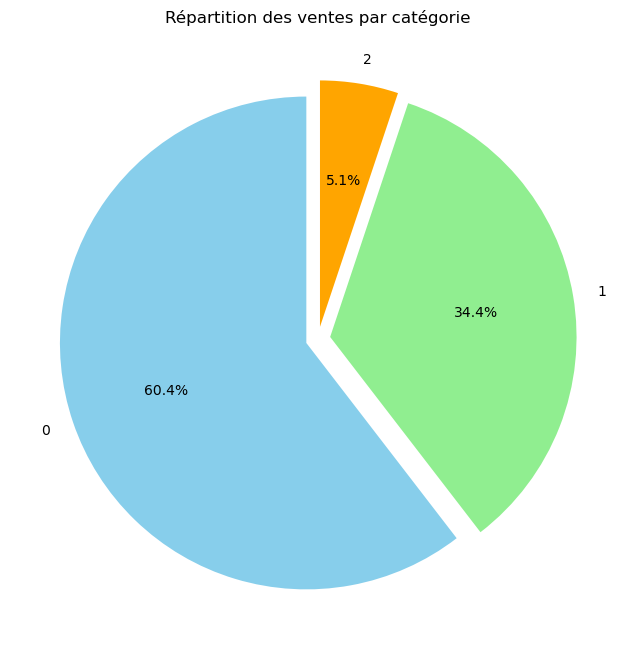

In [63]:
#Compte le nombre de ventes par catégorie
sales_by_category = df_merge['categ'].value_counts()

#Trace le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange'], startangle=90, explode=[0.05]*len(sales_by_category))
plt.title('Répartition des ventes par catégorie')
plt.show()

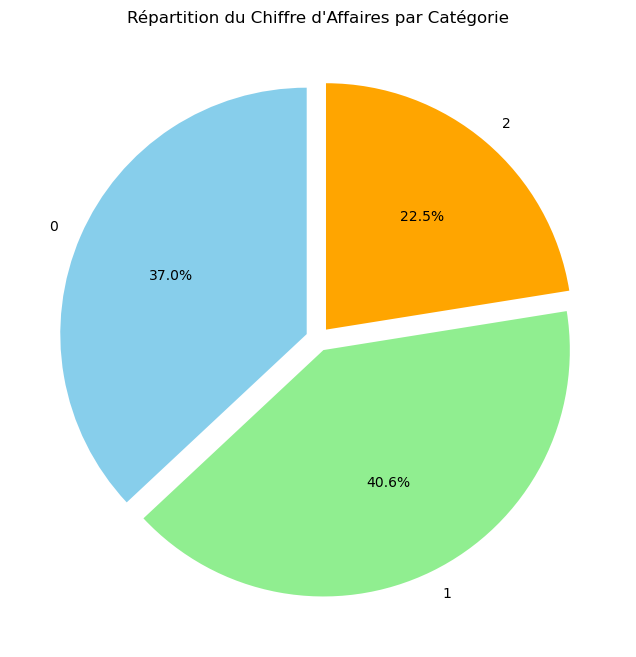

In [64]:
#Calcul du chiffre d'affaires par catégorie
revenue_by_category = df_merge.groupby('categ')['price'].sum()

#Création du diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_category, labels=revenue_by_category.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightgreen', 'orange'], startangle=90, explode=[0.05]*len(revenue_by_category))

plt.title('Répartition du Chiffre d\'Affaires par Catégorie')
plt.show()

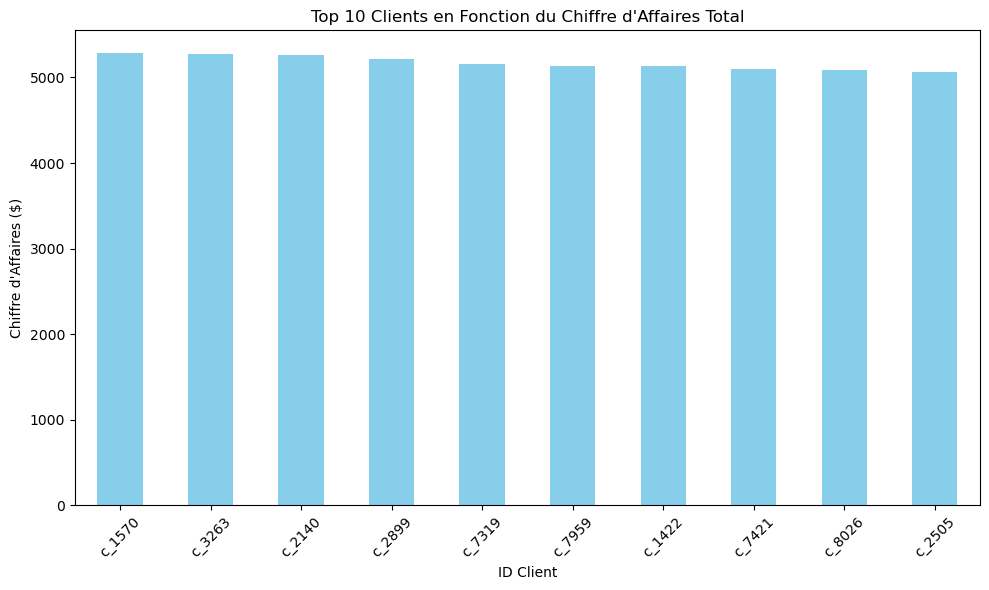

In [65]:
#Calcul du chiffre d'affaires par client
revenue_by_client = df_merge.groupby('client_id')['price'].sum()

#Sélection des 10 meilleurs clients
top_10_clients = revenue_by_client.nlargest(10)

#Création du graphique en barres
plt.figure(figsize=(10, 6))
top_10_clients.plot(kind='bar', color='skyblue')
plt.title('Top 10 Clients en Fonction du Chiffre d\'Affaires Total')
plt.xlabel('ID Client')
plt.ylabel('Chiffre d\'Affaires ($)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse des Corrélations </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Age / Catégorie des livres achetés</h3>
</div>

In [66]:
# Création colonne age

# Obtenir l'année actuelle
current_year = datetime.now().year - 1

# Calcule l'âge à partir de l'année de naissance
df_merge['age'] = current_year - df_merge['birth']


In [67]:
df_merge.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,age,age_group,year_month,day_of_week,day_of_week_fr,revenue
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,11.99,0,56,55-64,2021-03,Monday,Lundi,11.99
25141,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,19.37,0,63,55-64,2021-03,Monday,Lundi,19.37
56676,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,4.50,0,35,35-44,2021-03,Monday,Lundi,4.50
144726,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,6.55,0,34,25-34,2021-03,Monday,Lundi,6.55
75241,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,16.49,0,67,65+,2021-03,Monday,Lundi,16.49


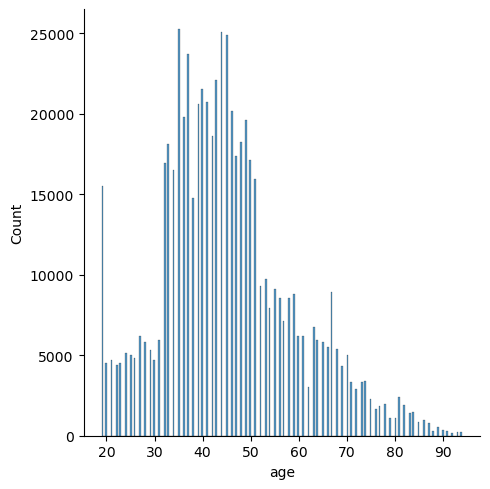

In [68]:
# Distribution des âges par rapport au nombre de transactions

sns.displot(df_merge['age'], kde=False)

In [69]:
#Garde uniquement les informations concernants les clients et enlève les doublons des clients 

df_merge_uniq_client = df_merge.groupby('client_id').agg({
    'sex': 'first',   # Garde la première valeur car elle est identique dans le groupe
    'birth': 'first', # Garde la première valeur
    'age': 'first',       # Applique la somme sur la colonne 'price'
    'price': 'sum'         # Date la plus ancienne par client
}).reset_index()

df_merge_uniq_client

,client_id,sex,birth,age,price
0,c_1,m,1955,68,629.02
1,c_10,m,1956,67,1353.60
2,c_100,m,1992,31,254.85
3,c_1000,f,1966,57,2291.88
4,c_1001,m,1982,41,1823.85
...,...,...,...,...,...
8591,c_995,m,1955,68,189.41
8592,c_996,f,1970,53,1637.34
8593,c_997,f,1994,29,1490.01
8594,c_998,m,2001,22,2822.22


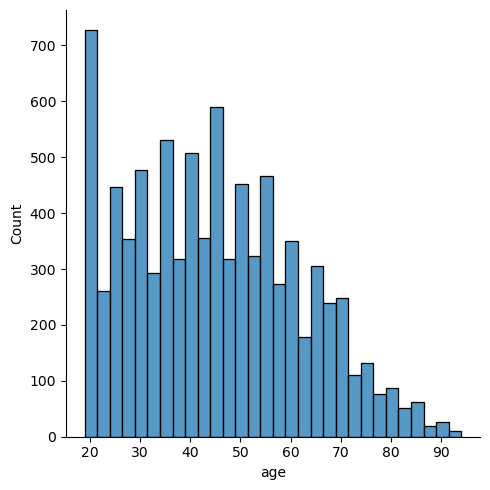

In [70]:
# Distribution des âges par rapport aux clients unique

sns.displot(df_merge_uniq_client['age'], kde=False)

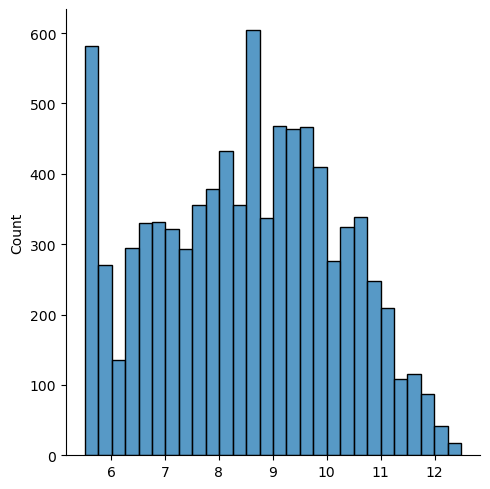

In [71]:
from scipy.stats import boxcox

#Transforme la distribution pour que les données soient plus proches d'une distribution normale
df_mergeboxcox, lambda_value = boxcox(df_merge_uniq_client['age'])  
sns.displot(df_mergeboxcox, kde=False)

In [72]:
from scipy.stats import kstest, norm

# Test de Kolmogorov-Smirnov avec une distribution normale
stat, p_value = kstest(df_mergeboxcox, 'norm', args=(np.mean(df_mergeboxcox), np.std(df_mergeboxcox)))

print(f"Statistique du test : {stat}")
print(f"P-value : {p_value}")

if p_value > 0.05:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Statistique du test : 0.048217181768096834
P-value : 8.316544088579427e-18
Les données ne suivent pas une distribution normale (on rejette H0)


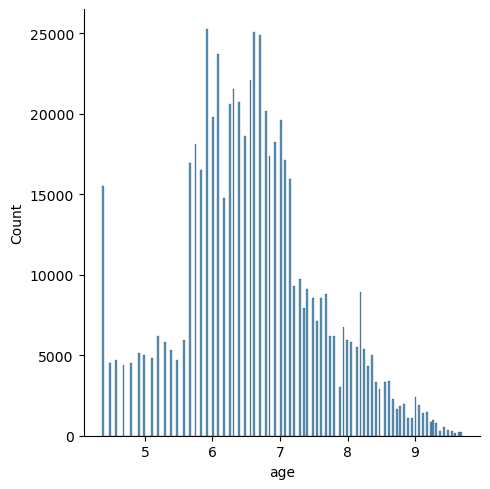

In [73]:
df_mergelog = np.sqrt(df_merge['age']) 
sns.displot(df_mergelog, kde=False)

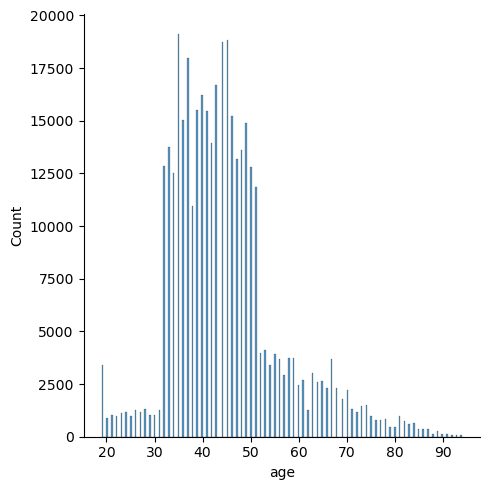

In [74]:
sns.displot(df_merge[df_merge['categ'] == 0]['age'], kde=False)

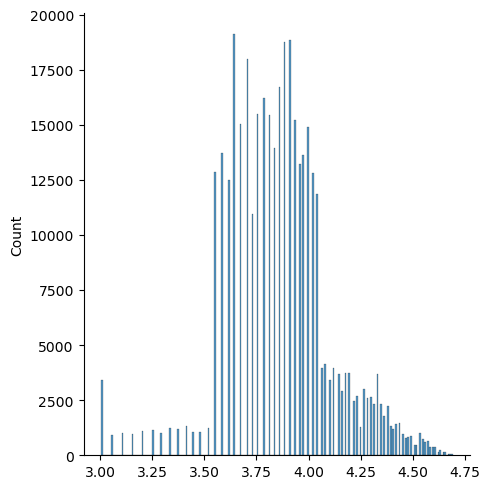

In [75]:
from scipy.stats import boxcox

#Transforme la distribution pour que les données soient plus proches d'une distribution normale
df_mergeboxcox, lambda_value = boxcox(df_merge[df_merge['categ'] == 0]['age'])  
sns.displot(df_mergeboxcox, kde=False)

In [76]:
from scipy.stats import kstest, norm

# Test de Kolmogorov-Smirnov avec une distribution normale
stat, p_value = kstest(df_mergeboxcox, 'norm', args=(np.mean(df_mergeboxcox), np.std(df_mergeboxcox)))

print(f"Statistique du test : {stat}")
print(f"P-value : {p_value}")

if p_value > 0.05:
    print("Les données suivent une distribution normale (on ne rejette pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0)")

Statistique du test : 0.07557193849881993
P-value : 0.0
Les données ne suivent pas une distribution normale (on rejette H0)


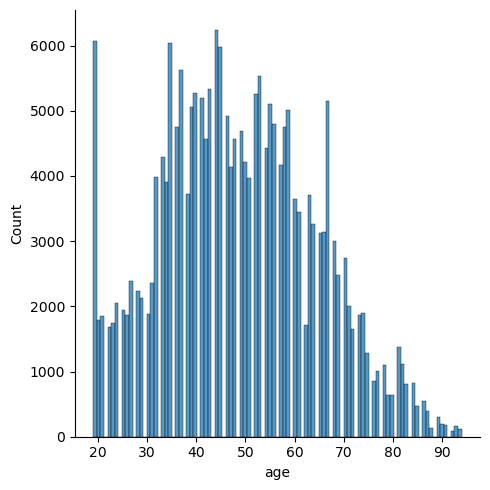

In [77]:
sns.displot(df_merge[df_merge['categ'] == 1]['age'], kde=False)

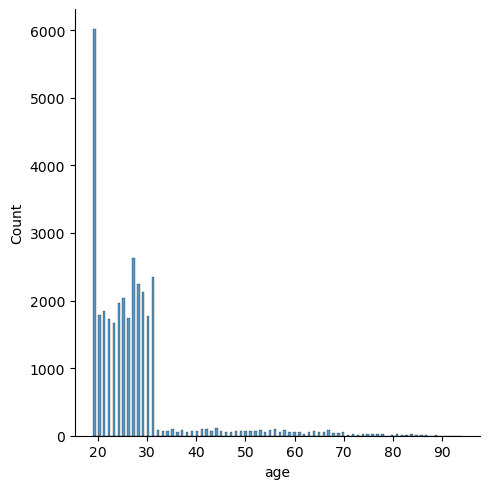

In [78]:
sns.displot(df_merge[df_merge['categ'] == 2]['age'], kde=False)

In [79]:
# Test de Kolmogorov-Smirnov (pour vérifier si une variable suit une distribution normale)
stat, p_value = stats.kstest(df_merge[df_merge['categ'] == 2]['age'], 'norm')
print(f'Statistic: {stat}, p-value: {p_value}')

Statistic: 1.0, p-value: 0.0


1 est la distance max que peut séparer la distribution des données à une distribution normale
p-value extrement faible donc on rejette l'hypothèse nulle: hypothèse nulle est que la variable suit une distribution normale 

Donc la distribution n'est pas une distribution normale

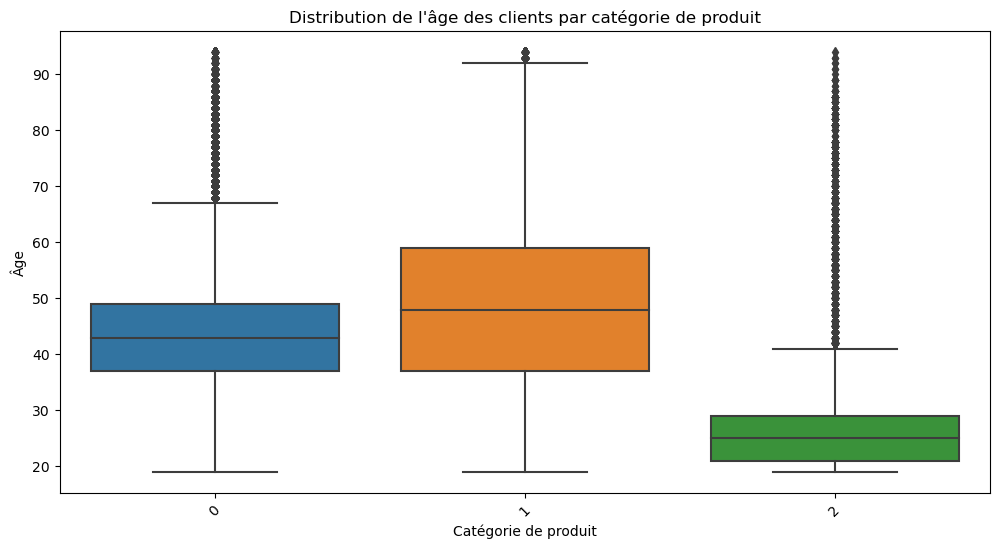

In [80]:
# Boxplot pour visualiser la distribution de l'âge par catégorie
plt.figure(figsize=(12, 6))
sns.boxplot(x='categ', y='age', data=df_merge)
plt.title('Distribution de l\'âge des clients par catégorie de produit')
plt.xlabel('Catégorie de produit')
plt.ylabel('Âge')
plt.xticks(rotation=45)
plt.show()


Le test de Levene est utilisé pour vérifier l'hypothèse d'égalité des variances entre plusieurs groupes. Il est particulièrement utile après l'ANOVA pour vérifier l'hypothèse d'homoscédasticité.

In [81]:
#Pour tester l'homogénéité des variances 

#Test de Levene
#H0: Les variances des différents groupes est différente
#H1: Au moins une des variances des différents groupes est différentes

nom_groupe = [0,1,2]
groups = [df_merge[df_merge['categ'] == group]['age'] for group in nom_groupe]
stat, p_value = stats.levene(*groups)
print(f'Levene statistic: {stat}, p-value: {p_value}')

#pvalue inférieur à 0,05 (au seuil de 5%) donc variances des groupes considérées comme différentes
#Donc condition d'homogénéité des variances n'est pas respecté

Levene statistic: 24651.780367284307, p-value: 0.0


In [82]:
#Pour tester l'homogénéité des variances 
#Test de Bartlett 
#Condition d'utilisation: distribution normale des groupes de données

stats.bartlett(df_merge[df_merge['categ'] == 0]["age"],
        df_merge[df_merge['categ'] == 1]["age"],
        df_merge[df_merge['categ'] == 2]["age"])

#Avec un seuil de 5%
#H0 : Les variances de chaque groupe sont égales si p-value > 5%
#H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%

BartlettResult(statistic=34075.16704707244, pvalue=0.0)

In [83]:
#Exemple de Test ANOVA (pas utilisable avec les données)

from scipy.stats import f_oneway

# Groupement des âges par catégorie de produit
groups = [df_merge[df_merge['categ'] == cat]['age'] for cat in df_merge['categ'].unique()]

# Test ANOVA
#Condition d'utilisation: distribution normale des données et égalité des variances
#HO: les moyennes de tous les groupes sont égales
#H1: au moins une des moyennes des groupes est différentes des autres

f_stat, p_value = f_oneway(*groups)
print(f'F-statistic: {f_stat}, p-value: {p_value}')


F-statistic: 39705.51969324279, p-value: 0.0


In [84]:
# On calcule l'âge moyen pour chaque catégorie de livre
age_by_categ = df_merge.groupby('categ')['age'].median().reset_index()
age_by_categ.columns = ['categ', 'mean_age']

# Pour le test de corrélation, nous avons besoin des âges et des catégories sous forme de séries
ages = df_merge['age']
categories= df_merge['categ']

# Effectuer le test de Kruskal-Wallis
stat, p_value = stats.kruskal(categories, ages)

# Afficher les résultats
print(f"Statistique de test : {stat}")
print(f"P-value : {p_value}")

# Interprétation du résultat
if p_value < 0.05:
    print("Il y a une différence significative entre les groupes.")
else:
    print("Il n'y a pas de différence significative entre les groupes.")


Statistique de test : 993701.3790028571
P-value : 0.0
Il y a une différence significative entre les groupes.


Contexte et problématique

Dans le cadre de l'analyse des données de vente de livres, nous cherchons à savoir s'il existe une corrélation entre l'âge des clients et les catégories de livres achetées. Les données recueillies ne suivent pas une distribution normale et les variances entre les groupes ne sont pas homogènes, ce qui rend l'utilisation des tests paramétriques (comme l'ANOVA) inappropriée.

Hypothèse nulle (H₀) : L'âge des clients n'a pas d'influence sur la catégorie de livres achetée. Il n'y a pas de différence significative entre les âges des groupes correspondant à chaque catégorie de livres.

Hypothèse alternative (H₁) : L'âge des clients a un effet significatif sur la catégorie de livres achetée. Il existe des différences significatives entre les âges des groupes correspondant aux différentes catégories de livres.

Test statistique choisi

Étant donné que les conditions de normalité et d'homogénéité des variances ne sont pas remplies, j'ai choisi d'utiliser le test de Kruskal-Wallis, un test non paramétrique qui permet de comparer les distributions de plusieurs groupes indépendants. Ce test est une alternative à l'ANOVA lorsqu'on ne peut pas faire l'hypothèse de normalité.

Le test de Kruskal-Wallis est utilisé pour évaluer si les échantillons proviennent de populations avec la même médiane. Dans notre cas, les groupes sont formés par les différentes catégories de livres achetées et la variable analysée est l'âge des clients.

Résultats du test

Après avoir effectué le test de Kruskal-Wallis, j'ai obtenu les résultats suivants :

Statistique de test : 993701.38

P-value : 0.0

Interprétation des résultats

La statistique de test obtenue est très élevée et la p-value associée est égale à 0.0, ce qui indique que nous pouvons rejeter l'hypothèse nulle (H₀) avec un très haut niveau de confiance. Autrement dit, il existe des différences significatives entre les groupes d'âge des clients en fonction des catégories de livres achetées.

En résumé, ces résultats montrent que l'âge des clients influence significativement la catégorie de livre achetée. Cela peut suggérer des préférences marquées des clients de différents âges pour certaines catégories de livres.

Conclusion

Le test de Kruskal-Wallis nous a permis de conclure que l'âge des clients est un facteur déterminant dans le choix de la catégorie de livre acheté. Ces résultats pourraient être utilisés pour adapter les stratégies de marketing, comme la segmentation des clients ou le ciblage publicitaire en fonction des tranches d'âge.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Sexe / Catégorie des livres achetés</h3>
</div>

<Axes: xlabel='categ', ylabel='count'>

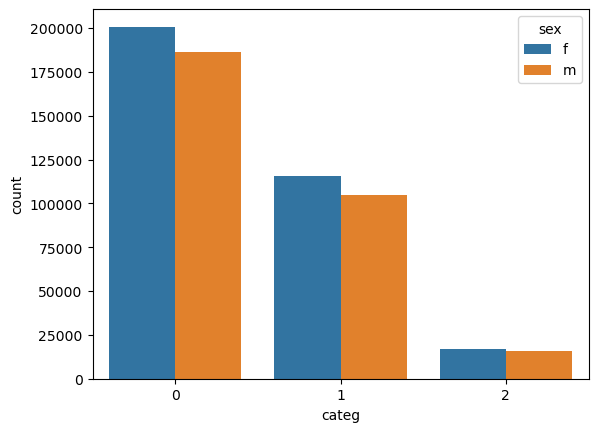

In [85]:
#Diagramme à barres de la variable 'categ' en fonction du sexe

sns.countplot(x='categ', hue='sex', data=df_merge)

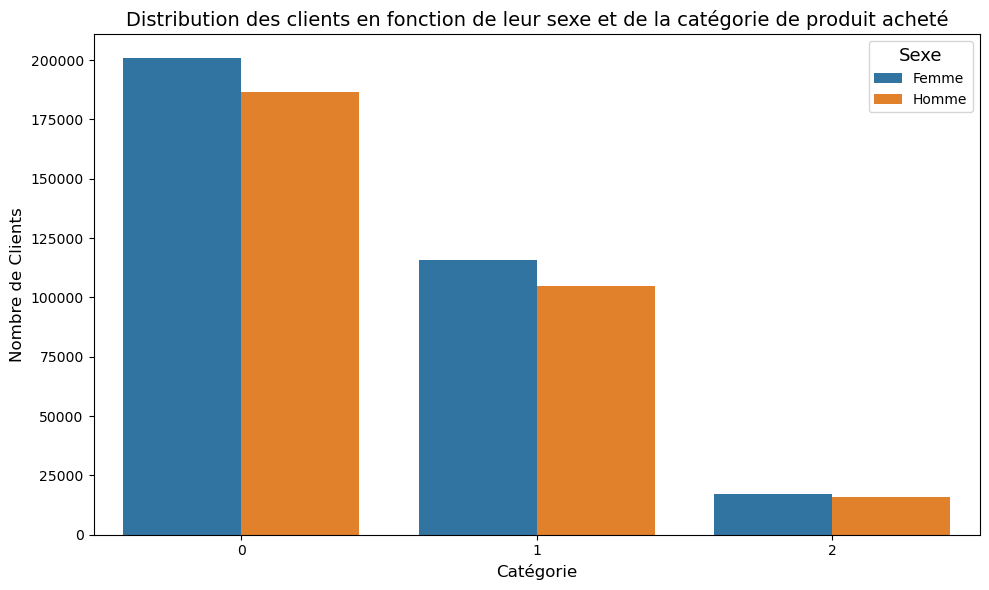

In [86]:
#Diagramme à barres de la variable 'categ' en fonction du sexe



# Crée le graphique
plt.figure(figsize=(10,6))
sns.countplot(x='categ', hue='sex', data=df_merge)

# Ajoute les labels et le titre
plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Nombre de Clients', fontsize=12)
plt.title('Distribution des clients en fonction de leur sexe et de la catégorie de produit acheté', fontsize=14)

# Modifie le label de la légende
plt.legend(title='Sexe', title_fontsize='13', labels=['Femme', 'Homme'])

# Afficher le graphique
plt.tight_layout()
plt.show()


In [87]:
#Test du chi2

#Hypothèse
#H0: la catégorie du livre acheté est indépendante du sexe
#H1: la catégorie du livre acheté n'est pas indépendante du sexe

In [88]:
#Tableau de contingence entre les variables 'categ' et 'sex'

cont_table_categ_sex = pd.crosstab(df_merge['categ'], df_merge['sex'])

cont_table_categ_sex

sex,f,m
categ,,
0,200793,186488
1,115721,104884
2,16980,15868


In [89]:
#Test du chi2

stats.chi2_contingency(cont_table_categ_sex, correction = True)

Chi2ContingencyResult(statistic=22.66856665178056, pvalue=1.1955928116587024e-05, dof=2, expected_freq=array([[201574.89662481, 185706.10337519],
       [114822.13191434, 105782.86808566],
       [ 17096.97146086,  15751.02853914]]))

In [90]:
# pvalue < 0.05 donc on peut rejeter l'hypothèse H0

Contexte et problématique

L'objectif de cette analyse est d'examiner s'il existe une relation entre le sexe des clients et la catégorie de livre achetée. Nous souhaitons savoir si les hommes et les femmes ont des préférences significativement différentes pour certaines catégories de livres. Le sexe est une variable catégorielle binaire (hommes et femmes) et la catégorie de livres est une variable catégorielle avec plusieurs niveaux (trois dans ce cas précis : 0, 1 et 2).

Pour ce type de données (catégorielles), un test statistique approprié est le test du chi² d'indépendance. Ce test permet de vérifier s'il existe une association entre deux variables catégorielles en comparant les fréquences observées à des fréquences théoriques (attendues) sous l'hypothèse d'indépendance. J'ai choisi ce test car il est conçu pour des variables qualitatives, contrairement à des tests comme le test t ou l'ANOVA, qui sont réservés à des variables quantitatives.

Hypothèses

Hypothèse nulle (H₀) : Il n'y a pas d'association entre le sexe des clients et la catégorie de livre achetée. Autrement dit, la répartition des hommes et des femmes dans chaque catégorie est la même.

Hypothèse alternative (H₁) : Il existe une association entre le sexe des clients et la catégorie de livre achetée. Les préférences pour certaines catégories de livres diffèrent entre les hommes et les femmes.

Test statistique utilisé

J'ai réalisé un test du chi² d'indépendance en utilisant le tableau de contingence suivant :

Sexe	Hommes (m)	Femmes (f)
Catégorie 0	200793	186488
Catégorie 1	115721	104884
Catégorie 2	16980	15868

Ce test compare les fréquences observées à des fréquences théoriques qui seraient attendues si le sexe et la catégorie de livre étaient indépendants. Si les fréquences observées s'écartent fortement des fréquences attendues, cela indique qu'il existe probablement une relation entre les deux variables.

Résultats du test
Le test a donné les résultats suivants :

Statistique du chi² : 22.67

p-value : 1.19559e-05

Degrés de liberté (dof) : 2

Fréquences attendues :

Array des fréquences attendues:

[
201574.90
185706.10
114822.13
105782.87
17096.97
15751.03
]

  


Interprétation des résultats

Statistique du chi² : La valeur de 22.67 suggère qu'il existe une différence notable entre les fréquences observées et attendues, ce qui suggère une possible association entre le sexe et la catégorie de livre achetée.

p-value : La p-value est extrêmement petite (1.19559e-05), bien inférieure à un seuil de significativité de 0.05. Cela nous permet de rejeter l'hypothèse nulle (H₀) avec un très haut niveau de confiance. Autrement dit, les données fournissent des preuves solides qu'il existe une association significative entre le sexe et la catégorie de livre achetée.

Degrés de liberté : Le test a été réalisé avec 2 degrés de liberté, ce qui est cohérent avec le nombre de catégories de livres (3 - 1 = 2).

Fréquences attendues : Les fréquences attendues pour chaque combinaison de sexe et de catégorie montrent ce que l'on attendrait si le sexe n'avait pas d'effet sur la catégorie de livre achetée. Par exemple, pour la catégorie 0, nous attendions 201574.90 hommes et 185706.10 femmes, alors que nous avons observé 200793 hommes et 186488 femmes.

Conclusion

Le test du chi² d'indépendance révèle qu'il existe une association significative entre le sexe des clients et la catégorie de livre achetée. Cela signifie que les préférences en matière de catégories de livres diffèrent entre les hommes et les femmes. Ces résultats peuvent être exploités pour mieux cibler les offres de livres et ajuster les stratégies marketing en fonction du sexe des clients, en tenant compte des préférences observées dans les différentes catégories de livres.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Age / Montant total des achats</h3>
</div>


In [91]:
#Test réalisé à partir de la moyenne des montants totaux des achats par âge

#Calcule le montant total des achats par client
client_total_purchases = df_merge.groupby('client_id')['price'].sum().reset_index()
client_total_purchases.columns = ['client_id', 'total_price']

#Associe l'âge à chaque client (chaque client a un seul âge)
client_age = df_merge[['client_id', 'age']].drop_duplicates()

# Fusionne pour obtenir le total des achats et l'âge de chaque client
client_age_total = pd.merge(client_age, client_total_purchases, on='client_id')

#Calcule la moyenne des montants totaux des achats par âge
age_grouped = client_age_total.groupby('age')['total_price'].mean().reset_index()
age_grouped.columns = ['age', 'avg_total_price']

#Effectue le test de Spearman entre l'âge et la moyenne des montants totaux des achats
corr, p_value = stats.spearmanr(age_grouped['age'], age_grouped['avg_total_price'])

#Affiche les résultats du test
print(f"Spearman correlation coefficient: {corr}")
print(f"p-value: {p_value}")

Spearman correlation coefficient: -0.7276555023923446
p-value: 9.644786855635588e-14


In [92]:
#Calcule le montant total des achats par client
client_total_purchases = df_merge.groupby('client_id')['price'].sum().reset_index()
client_total_purchases.columns = ['client_id', 'total_price']

#Associe l'âge à chaque client (chaque client a un seul âge)
client_age = df_merge[['client_id', 'age']].drop_duplicates()

# Fusionne pour obtenir le total des achats et l'âge de chaque client
client_age_total = pd.merge(client_age, client_total_purchases, on='client_id')

#Calcule la moyenne des montants totaux des achats par âge
age_grouped = client_age_total.groupby('age')['total_price'].mean().reset_index()
age_grouped.columns = ['age', 'avg_total_price']

#Effectue le test de Spearman entre l'âge et la moyenne des montants totaux des achats
corr, p_value = stats.spearmanr(client_age_total['age'], client_age_total['total_price'])

# Affiche les résultats du test
print(f"Spearman correlation coefficient: {corr}")
print(f"p-value: {p_value}")

Spearman correlation coefficient: -0.18453804793783096
p-value: 1.0212910436382683e-66


Contexte et problématique

L'objectif de cette analyse est d'évaluer s'il existe une corrélation entre l'âge des clients et le montant total de leurs achats. Cette analyse pourrait nous aider à comprendre si l'âge des clients a un impact sur leurs dépenses globales dans le cadre de l'achat de livres.

Les données sur l'âge et le montant des achats étant quantitatives et n'ayant pas une distribution normale, j'ai choisi d'utiliser un test de corrélation non paramétrique. La corrélation de Pearson serait inadaptée ici, car elle suppose la normalité des données. À la place, j'ai donc utilisé le test de Spearman pour évaluer une potentielle relation monotone entre ces deux variables.

Hypothèses

Hypothèse nulle (H₀) : Il n'existe pas de corrélation entre l'âge des clients et le montant total de leurs achats. Autrement dit, l'âge n'a aucun effet sur le montant dépensé.

Hypothèse alternative (H₁) : Il existe une corrélation significative entre l'âge des clients et le montant total de leurs achats.

Test statistique choisi

Le test de Spearman est un test non paramétrique qui mesure la force et la direction d'une relation monotone entre deux variables continues. Contrairement au test de Pearson, qui détecte uniquement des relations linéaires, le test de Spearman est plus flexible et détecte des relations monotones, même non linéaires. Il est donc particulièrement adapté pour les données qui ne suivent pas une distribution normale.

Résultats du test

Les résultats obtenus après avoir effectué le test de Spearman sont les suivants :

Coefficient de corrélation de Spearman : -0.1845
p-value : 1.02e-66

Interprétation des résultats

Coefficient de corrélation de Spearman (-0.1845) : Le coefficient de corrélation de Spearman varie entre -1 et 1. Ici, la valeur de -0.1845 indique une corrélation négative faible entre l'âge des clients et le montant total de leurs achats. Cela signifie que, dans cette population, il existe une légère tendance selon laquelle, à mesure que l'âge des clients augmente, le montant total des achats a tendance à diminuer.

p-value (1.02e-66) : La p-value extrêmement petite (bien inférieure au seuil de significativité classique de 0.05) indique que cette corrélation est hautement significative. Nous pouvons donc rejeter l'hypothèse nulle (H₀) et conclure qu'il existe bien une relation monotone entre l'âge des clients et le montant total de leurs achats.

Conclusion

Les résultats du test de Spearman montrent qu'il existe une corrélation négative faible mais significative entre l'âge des clients et le montant total de leurs achats. Autrement dit, il semble que les clients plus âgés aient tendance à dépenser légèrement moins que les plus jeunes. Toutefois, la force de cette corrélation est faible, ce qui indique que l'âge, bien qu'ayant un effet, n'est pas le seul facteur influençant le montant des achats.

Ces résultats pourraient être pris en compte pour adapter les offres commerciales ou les stratégies marketing, en tenant compte du fait que les dépenses varient légèrement avec l'âge, même si cet effet est modéré.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


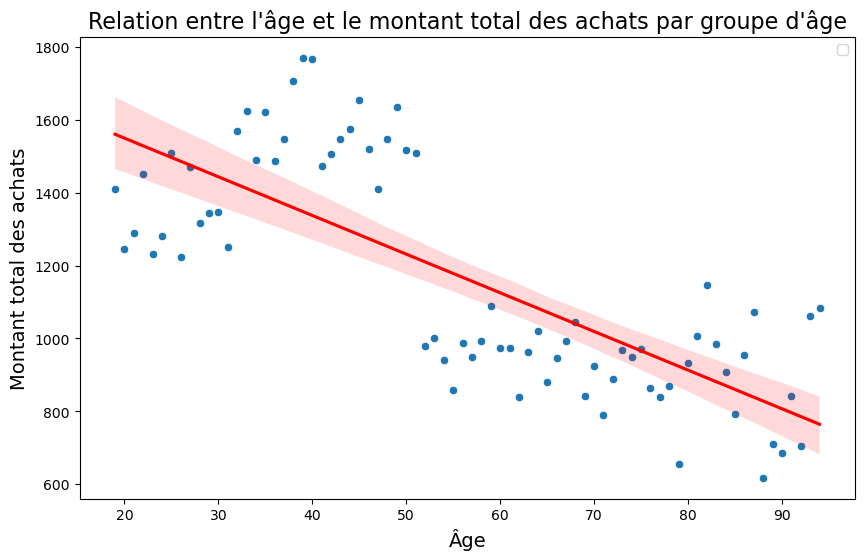

In [93]:
# Crée un graphique pour visualiser la relation entre âge et montant total des achats
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='avg_total_price', data=age_grouped)

# Ajoute une ligne de tendance
sns.regplot(x='age', y='avg_total_price', data=age_grouped, scatter=False, color='red', line_kws={"label":"Tendance"})

# Ajoute des labels et un titre
plt.title('Relation entre l\'âge et le montant total des achats par groupe d\'âge', fontsize=16)
plt.xlabel('Âge', fontsize=14)
plt.ylabel('Montant total des achats', fontsize=14)

# Affiche la légende
plt.legend()

# Affiche le graphique
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


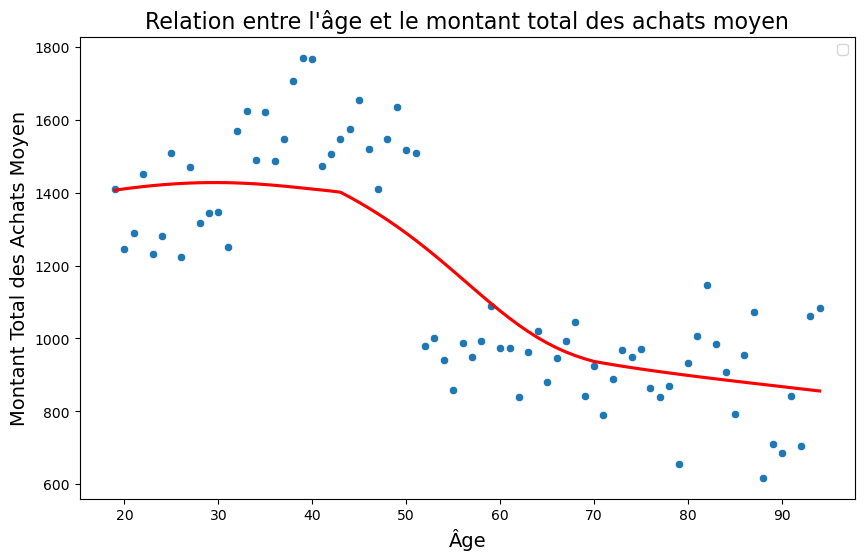

In [94]:
# Crée un graphique pour visualiser la relation entre âge et montant total des achats
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='avg_total_price', data=age_grouped)

# Ajoute une ligne de tendance non paramétrique
sns.regplot(x='age', y='avg_total_price', data=age_grouped, scatter=False, color='red', lowess=True, line_kws={"label":"Tendance non linéaire"})

# Ajoute des labels et un titre
plt.title('Relation entre l\'âge et le montant total des achats moyen', fontsize=16)
plt.xlabel('Âge', fontsize=14)
plt.ylabel('Montant Total des Achats Moyen', fontsize=14)

# Affiche la légende
plt.legend()

# Affiche le graphique
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


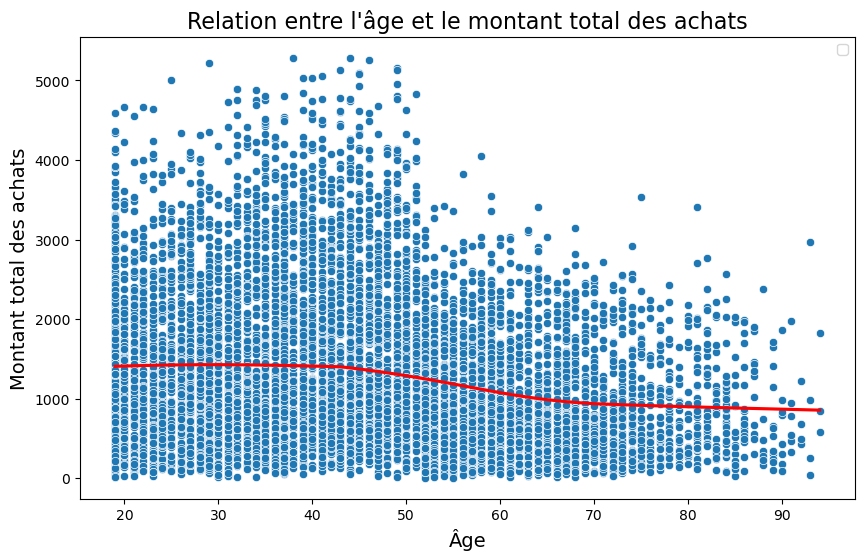

In [95]:
# Crée un graphique pour visualiser la relation entre âge et montant total des achats
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_price', data=client_age_total)

# Ajoute une ligne de tendance non paramétrique
sns.regplot(x='age', y='avg_total_price', data=age_grouped, scatter=False, color='red', lowess=True, line_kws={"label":"Tendance non linéaire"})

# Ajoute des labels et un titre
plt.title('Relation entre l\'âge et le montant total des achats', fontsize=16)
plt.xlabel('Âge', fontsize=14)
plt.ylabel('Montant total des achats', fontsize=14)

# Affiche la légende
plt.legend()

# Affiche le graphique
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Age / Fréquence d'achat</h3>
</div>

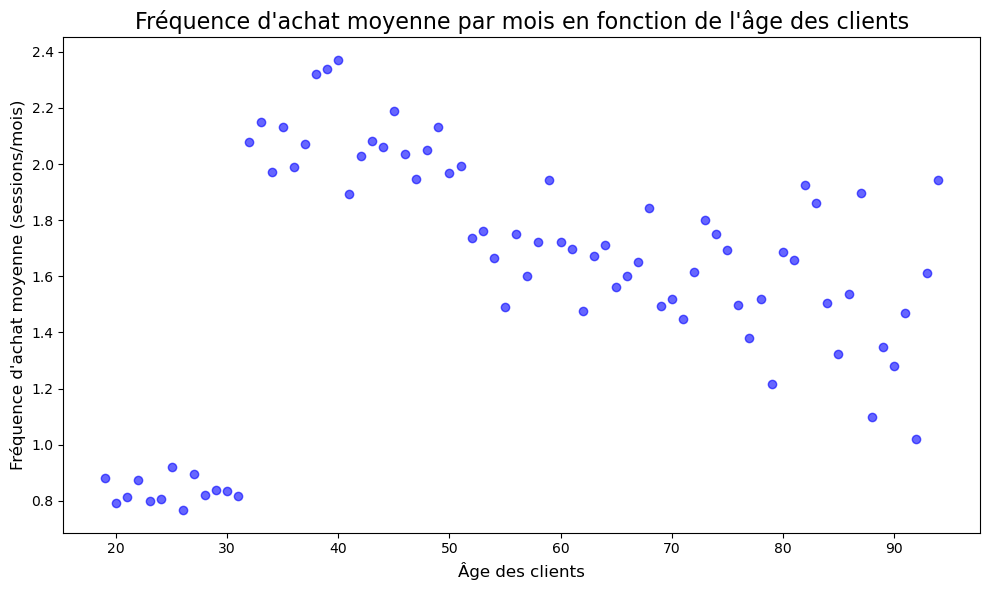

In [96]:
# Calcule le nombre de sessions uniques, date la plus récente et date la plus ancienne par client
client_freq_month = df_merge.groupby('client_id').agg(
    sessions_uniques=('session_id', 'nunique'),  # Nombre de sessions uniques par client
    date_min=('date', 'min'),                   # Date de la première session
    age=('age', 'first')                        # Âge du client
)

# Récupère la date la plus récente du dataset (fin de collecte des données)
date_collecte_max = df_merge['date'].max()

# Calcule la durée en mois entre la date de la première session et la date de collecte des données
client_freq_month['duree_mois'] = (date_collecte_max - client_freq_month['date_min']).dt.days / 30.44

# Calcule la fréquence d'achat (nombre de sessions / durée en mois)
client_freq_month['frequence_achat_mois'] = client_freq_month.apply(
    lambda row: row['sessions_uniques'] / row['duree_mois'] if row['duree_mois'] > 0 else 0, axis=1
)

# Calcule la fréquence d'achat moyenne pour chaque âge
freq_achat_par_age = client_freq_month.groupby('age')['frequence_achat_mois'].mean()

# Crée un graphique scatter (fréquence d'achat moyenne par mois en fonction de l'âge)
plt.figure(figsize=(10, 6))
plt.scatter(freq_achat_par_age.index, freq_achat_par_age.values, alpha=0.6, color='blue')

# Ajoute des labels et un titre
plt.title('Fréquence d\'achat moyenne par mois en fonction de l\'âge des clients', fontsize=16)
plt.xlabel('Âge des clients', fontsize=12)
plt.ylabel('Fréquence d\'achat moyenne (sessions/mois)', fontsize=12)

# Affiche le graphique
plt.tight_layout()
plt.show()


In [97]:
#Effectue le test de Spearman entre l'âge et la moyenne des montants totaux des achats
corr, p_value = stats.spearmanr(client_freq_month['age'], client_freq_month['frequence_achat_mois'])

# Affiche les résultats du test
print(f"Spearman correlation coefficient: {corr}")
print(f"p-value: {p_value}")

Spearman correlation coefficient: 0.21148136661227168
p-value: 1.6653525092359836e-87


Contexte et Problématique

L'objectif de cette analyse est de comprendre s'il existe une corrélation entre l'âge des clients et leur fréquence d'achat. Cette relation pourrait fournir des indications précieuses pour orienter les stratégies marketing et commerciales, en identifiant des comportements spécifiques selon les tranches d'âge des clients.

Les deux variables analysées sont l'âge des clients et leur fréquence d'achat, toutes deux étant des données continues. Étant donné que les données ne suivent pas une distribution normale, il est inapproprié d'utiliser le test de corrélation de Pearson, qui présuppose la normalité et la linéarité. Ainsi, j'ai opté pour un test de corrélation non paramétrique : le test de Spearman. Ce dernier est adapté pour examiner une relation monotone entre deux variables, indépendamment de la forme de leur distribution.

Hypothèses

Hypothèse nulle (H₀) : Il n'existe pas de corrélation entre l'âge des clients et leur fréquence d'achat. L'âge n'a pas d'impact significatif sur la fréquence d'achat.

Hypothèse alternative (H₁) : Il existe une corrélation significative entre l'âge des clients et leur fréquence d'achat.
Justification du Test Statistique

Le test de Spearman a été choisi en raison de sa robustesse dans le cas de données qui ne suivent pas une distribution normale. Contrairement au test de Pearson, Spearman mesure la force et la direction d'une relation monotone (qu'elle soit linéaire ou non) entre deux variables continues ou ordinales. Cela en fait un choix approprié pour évaluer la relation entre l'âge et la fréquence d'achat dans notre analyse.

Résultats du Test

Coefficient de corrélation de Spearman : 0.2114
p-value : 1.66e-87

Interprétation des Résultats

Coefficient de corrélation de Spearman (0.2114) : Ce coefficient indique une corrélation positive modérée entre l'âge des clients et leur fréquence d'achat. Autrement dit, à mesure que l'âge des clients augmente, leur fréquence d'achat tend également à augmenter, bien que cette corrélation ne soit pas extrêmement forte.

p-value (1.66e-87) : Cette p-value est extrêmement faible, bien en dessous du seuil de significativité habituel de 0.05. Cela signifie que la probabilité d'observer ces résultats par pur hasard est presque inexistante. Nous pouvons donc rejeter l'hypothèse nulle (H₀) et conclure qu'il existe une corrélation statistiquement significative entre l'âge des clients et leur fréquence d'achat.

Conclusion

Le test de corrélation de Spearman révèle une corrélation modérément positive et statistiquement significative entre l'âge des clients et leur fréquence d'achat. Contrairement à l'hypothèse nulle initiale, les résultats suggèrent que l'âge influence de manière significative la fréquence d'achat : les clients plus âgés semblent acheter plus fréquemment que les plus jeunes, en moyenne.

Ces résultats ouvrent la voie à de nouvelles opportunités de segmentation basée sur l'âge. Les équipes marketing pourraient explorer des stratégies adaptées pour fidéliser les clients âgés, qui, selon cette analyse, sont plus susceptibles de réaliser des achats fréquents. Néanmoins, d'autres facteurs influençant la fréquence d'achat doivent être pris en compte pour obtenir une compréhension plus globale des comportements d'achat.

Synthèse des résultats :
Corrélation positive modérée (coefficient de Spearman = 0.2114).
Signification statistique très forte (p-value = 1.66e-87).
Implication : L'âge a un effet significatif sur la fréquence d'achat des clients, mais d'autres facteurs pourraient également influencer ce comportement.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Age / Taille du panier moyen</h3>
</div>

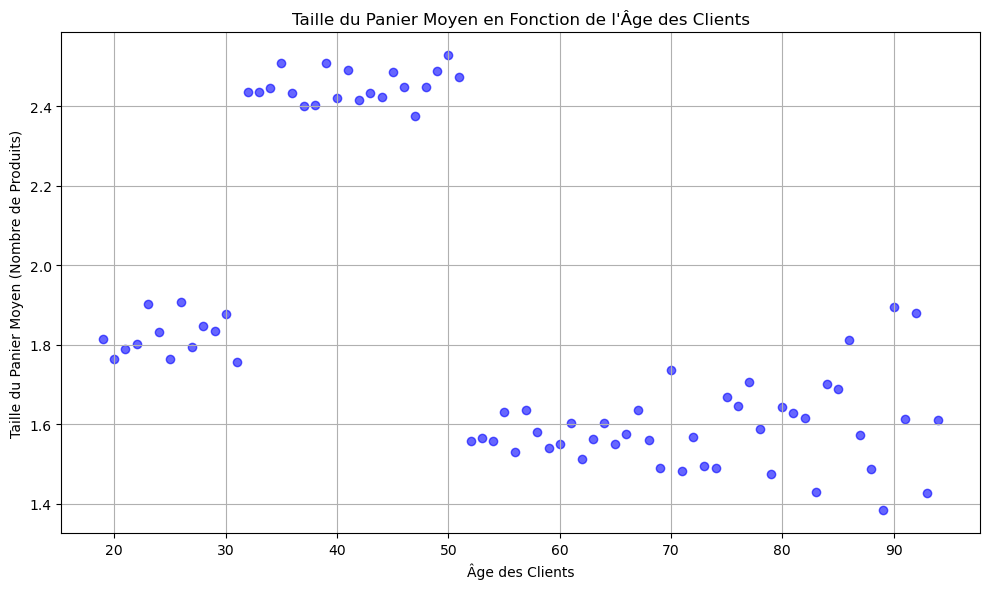

In [98]:
# Calcul du nombre total de produits achetés par client
total_products_by_client = df_merge.groupby('client_id')['id_prod'].count()

# Calcul du nombre total de sessions par client
total_sessions_by_client = df_merge.groupby('client_id')['session_id'].nunique()

# Calcul de la taille du panier moyen (nombre de produits par session) pour chaque client
panier_moyen_taille = total_products_by_client / total_sessions_by_client

# Fusionne les données d'âge et du panier moyen
age_by_client = df_merge[['client_id', 'age']].drop_duplicates().set_index('client_id')
age_vs_panier_moyen_taille = age_by_client.join(panier_moyen_taille.rename('panier_moyen_taille'))

#Calcule la moyenne des fréquences d'achats par âge
panier_moyen_grouped = age_vs_panier_moyen_taille.groupby('age')['panier_moyen_taille'].mean().reset_index()
panier_moyen_grouped.columns = ['age', 'avg_panier_moyen']

# Création du graphique en scatter plot (nuage de points)
plt.figure(figsize=(10, 6))
plt.scatter(panier_moyen_grouped['age'], panier_moyen_grouped['avg_panier_moyen'], color='blue', alpha=0.6)

plt.title('Taille du Panier Moyen en Fonction de l\'Âge des Clients')
plt.xlabel('Âge des Clients')
plt.ylabel('Taille du Panier Moyen (Nombre de Produits)')
plt.grid(True)
plt.tight_layout()

plt.show()



In [99]:
#Effectue le test de Spearman entre l'âge et la moyenne des montants totaux des achats
corr, p_value = stats.spearmanr(panier_moyen_grouped['age'], panier_moyen_grouped['avg_panier_moyen'])

# Affiche les résultats du test
print(f"Spearman correlation coefficient: {corr}")
print(f"p-value: {p_value}")

Spearman correlation coefficient: -0.5909501025290499
p-value: 1.9109216356955872e-08


Contexte et problématique

Dans cette analyse, nous cherchons à déterminer s'il existe une corrélation entre l'âge des clients et la taille du panier moyen. La taille du panier moyen représente le montant moyen dépensé par un client à chaque transaction. Cette analyse est importante pour comprendre si l'âge influence la quantité ou la valeur des produits que les clients achètent en moyenne, ce qui peut permettre de mieux segmenter les offres et les stratégies commerciales.

Les deux variables étudiées sont quantitatives : l'âge et la taille du panier moyen. Étant donné que les données ne suivent pas une distribution normale, l'utilisation du test de Pearson serait inappropriée. Ainsi, j'ai opté pour le test de corrélation de Spearman, qui est non paramétrique et permet d'évaluer les relations monotones entre deux variables continues.

Hypothèses

Hypothèse nulle (H₀) : Il n'y a pas de corrélation entre l'âge des clients et la taille de leur panier moyen. L'âge n'influence pas le montant moyen des achats.

Hypothèse alternative (H₁) : Il existe une corrélation significative entre l'âge des clients et la taille de leur panier moyen.

Justification du test statistique choisi

Le test de corrélation de Spearman est utilisé pour mesurer la force et la direction d'une relation monotone (croissante ou décroissante) entre deux variables continues ou ordinales. Contrairement au test de Pearson, le test de Spearman ne nécessite pas que les données suivent une distribution normale, et il est donc mieux adapté lorsque les données présentent des irrégularités comme des distributions asymétriques ou des valeurs extrêmes.

Résultats du test

Après avoir réalisé le test de Spearman, j'ai obtenu les résultats suivants :

Coefficient de corrélation de Spearman : -0.59095
p-value : 1.91e-08

Interprétation des résultats

Coefficient de corrélation de Spearman (-0.59095) : Le coefficient de corrélation de Spearman est de -0.59095, ce qui indique une corrélation négative modérée à forte entre l'âge des clients et la taille de leur panier moyen. Concrètement, cela signifie que, dans cette population, à mesure que l'âge des clients augmente, la taille moyenne du panier tend à diminuer de manière notable. Les clients plus jeunes ont tendance à avoir des paniers moyens plus élevés, tandis que les clients plus âgés semblent acheter moins ou pour des montants moindres par transaction.

p-value (1.91e-08) : La p-value est extrêmement faible (bien inférieure au seuil de significativité de 0.05), ce qui me permet de rejeter l'hypothèse nulle (H₀) avec un haut degré de confiance. Autrement dit, la probabilité que la corrélation observée soit due au hasard est extrêmement faible, et il existe donc une association statistiquement significative entre l'âge des clients et la taille de leur panier moyen.

Conclusion

Les résultats du test de Spearman montrent qu'il existe une corrélation négative significative entre l'âge des clients et la taille de leur panier moyen. À mesure que l'âge des clients augmente, la taille moyenne du panier diminue de façon notable. Cela peut s'expliquer par différents comportements d'achat entre les tranches d'âge, où les clients plus jeunes semblent avoir tendance à dépenser plus par transaction que les clients plus âgés.

Ces résultats peuvent être utiles pour adapter les stratégies marketing en fonction de l'âge des clients. Par exemple, des offres spécifiques ou des promotions peuvent être envisagées pour encourager les clients plus âgés à augmenter la taille de leur panier, ou des actions ciblées pourraient être développées pour maximiser la valeur des paniers des jeunes consommateurs.

In [100]:
#Pas possible d'utiliser ici car les variances ne sont pas homogènes
#De plus les distributions des groupes d'age ne sont pas des distributions normales

#Segmente les clients en groupes d'âge
bins = [0, 30, 50, np.inf]
labels = ['Moins de 30 ans', 'Entre 30 et 50 ans', 'Plus de 50 ans']
df_merge_group_age = df_merge
df_merge_group_age['groupe_age'] = pd.cut(df_merge_group_age['age'], bins=bins, labels=labels, right=False)

#Calcul de la taille du panier (nombre de lignes d'achat par session par client)
# On compte le nombre d'achats (lignes) par session
panier_par_session = df_merge_group_age.groupby(['session_id', 'client_id'])['id_prod'].count().reset_index()
panier_par_session.columns = ['session_id', 'client_id', 'taille_panier']

# Joindre la taille du panier aux informations des clients
df_merge_group_age = df_merge_group_age.merge(panier_par_session, on=['session_id', 'client_id'])

# Récupère un dataframe unique par session-client pour éviter les doublons (une session est unique à un client)
df_unique_session = df_merge_group_age.drop_duplicates(subset=['session_id', 'client_id'])

#Test ANOVA pour comparer la taille moyenne du panier entre les groupes d'âge
# Extraire les tailles de panier par groupe d'âge
moins_30 = df_unique_session[df_unique_session['groupe_age'] == 'Moins de 30 ans']['taille_panier']
entre_30_50 = df_unique_session[df_unique_session['groupe_age'] == 'Entre 30 et 50 ans']['taille_panier']
plus_50 = df_unique_session[df_unique_session['groupe_age'] == 'Plus de 50 ans']['taille_panier']

# Test ANOVA
f_stat, p_value = stats.f_oneway(moins_30, entre_30_50, plus_50)

print(f"F-statistique : {f_stat}")
print(f"p-value : {p_value}")

# Interprétation
if p_value < 0.05:
    print("Il existe une différence significative entre les groupes d'âge en termes de taille de panier.")
else:
    print("Il n'y a pas de différence significative entre les groupes d'âge en termes de taille de panier.")



F-statistique : 16790.817908908815
p-value : 0.0
Il existe une différence significative entre les groupes d'âge en termes de taille de panier.


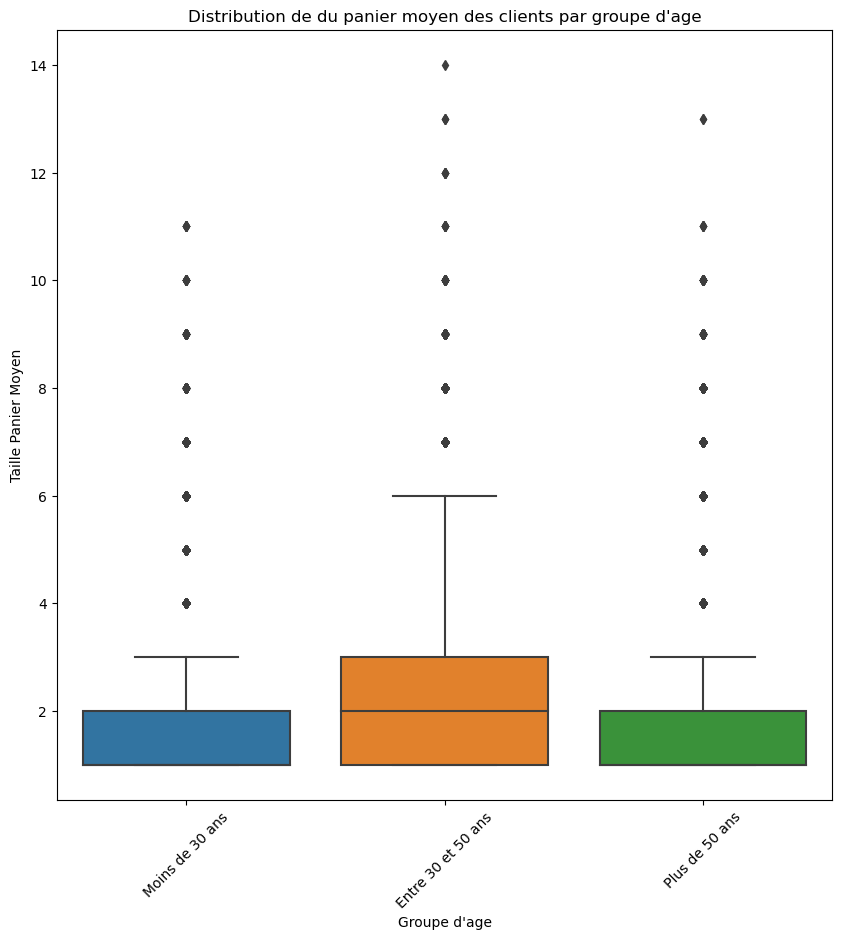

In [101]:
# Boxplot pour visualiser la distribution de l'âge par catégorie
plt.figure(figsize=(10, 10))
sns.boxplot(x='groupe_age', y='taille_panier', data=df_unique_session)
plt.title('Distribution de du panier moyen des clients par groupe d\'age')
plt.xlabel('Groupe d\'age')
plt.ylabel('Taille Panier Moyen')
plt.xticks(rotation=45)
plt.show()

In [102]:
stats.bartlett(df_unique_session[df_unique_session['groupe_age'] == 'Moins de 30 ans']["taille_panier"],
        df_unique_session[df_unique_session['groupe_age'] == 'Entre 30 et 50 ans']["taille_panier"],
        df_unique_session[df_unique_session['groupe_age'] == 'Plus de 50 ans']["taille_panier"])

BartlettResult(statistic=5367.717155900569, pvalue=0.0)

In [103]:
#H0 : Les variances de chaque groupe sont égales si p-value > 5%
#H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%

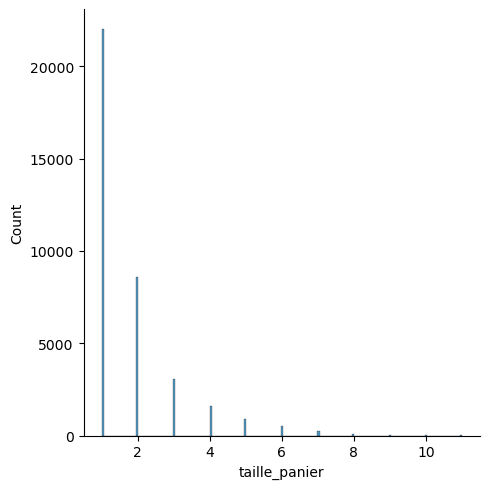

In [104]:
# Distribution des tailles de paniers par rapport au nombre de transactions

sns.displot(df_unique_session[df_unique_session['groupe_age'] == 'Moins de 30 ans']['taille_panier'], kde=False)

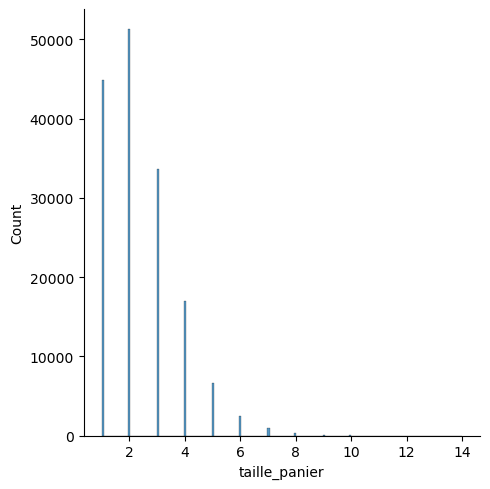

In [105]:
# Distribution des tailles de paniers par rapport au nombre de transactions

sns.displot(df_unique_session[df_unique_session['groupe_age'] == 'Entre 30 et 50 ans']['taille_panier'], kde=False)